In [1]:
#Importing libraries

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import isnan
from pandas import read_csv
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
import math
from sklearn.cluster import KMeans
from tensorflow.keras.layers import Dense, Dropout
import xgboost as xgb
import plotly.express as px
from tensorflow.keras.models import Sequential
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import SVG, display
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import plotly.offline as py # visualization
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.tree import export_graphviz
from graphviz import Source  # Importing Source for visualization
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
import graphviz
import joblib

# First cell: Setup
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Now warnings are suppressed for the entire notebook session.



In [316]:
# Load the datasets
telecom_train = pd.read_csv(r'C:\Users\chaim\OneDrive\Bureau\4DS\ML_Project_Files\archive (2)\churn-bigml-80.csv')
telecom_test = pd.read_csv(r'C:\Users\chaim\OneDrive\Bureau\4DS\ML_Project_Files\archive (2)\churn-bigml-20.csv')

# <a id='1'>1. Business Understanding</a>

### 📝 **Business Objectives**

<div style="font-size:18px;">

<table style="width:100%; border-collapse: collapse; font-size:18px;">
    <tr style="background-color:#E8F4FF; color:#3366CC; font-weight:bold;">
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Business Objective</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Description</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🔵 <b>BO1</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Enhance customer satisfaction by identifying the key factors driving customer churn.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🟢 <b>BO2</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Identify customers with a high likelihood of churn to enable effective retention strategies and minimize churn.</td>
    </tr>
</table>

</div>

---

### 🧩 **Data Science Objectives**

<div style="font-size:18px;">

<table style="width:100%; border-collapse: collapse; font-size:18px;">
    <tr style="background-color:#E8FFF4; color:#33AA33; font-weight:bold;">
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Data Science Objective</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Description</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🚀 <b>DSO1</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Build and evaluate advanced machine learning models to determine the best-performing model, analyze key churn-driving features, and design data-driven retention strategies.</td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🧩 <b>DSO2</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">Build and optimize machine learning algorithms to forecast churn and cluster customers to interpret their behavior patterns effectively.</td>
    </tr>
</table>

</div>


# <a id='2'>2. Data Understanding</a>

<h2 style="color:#2E86C1; font-weight:bold;">📊 Classification Based on Business Insight</h2>

<h3 style="color:#1ABC9C; font-weight:bold;">1. 🌟 Behavioral Variables</h3>
<p>These variables represent how customers interact with the telecom services, including their usage patterns and habits:</p>
<ul>
    <li><b>📈 Usage Metrics:</b></li>
    <ul>
        <li>📞 Total day minutes</li>
        <li>📞 Total day calls</li>
        <li>💰 Total day charge</li>
        <li>📞 Total eve minutes</li>
        <li>📞 Total eve calls</li>
        <li>💰 Total eve charge</li>
        <li>🌙 Total night minutes</li>
        <li>🌙 Total night calls</li>
        <li>💰 Total night charge</li>
        <li>🌍 Total intl minutes</li>
        <li>🌍 Total intl calls</li>
        <li>💰 Total intl charge</li>
    </ul>
    <li><b>📬 Voicemail Activity:</b></li>
    <ul>
        <li>📩 Number of vmail messages</li>
    </ul>
</ul>

<h3 style="color:#F4D03F; font-weight:bold;">2. 👥 Demographic Variables</h3>
<p>These variables reflect customer demographic information that can be used for segmentation and personalization:</p>
<ul>
    <li>🗺️ State</li>
    <li>📞 Area code</li>
</ul>

<h3 style="color:#5DADE2; font-weight:bold;">3. 📡 Service Subscriptions</h3>
<p>These variables indicate the services that customers subscribe to, which may influence their satisfaction and likelihood of churn:</p>
<ul>
    <li>🌍 International plan</li>
    <li>📬 Voice mail plan</li>
</ul>

<h3 style="color:#D35400; font-weight:bold;">4. 💵 Financial Variables</h3>
<p>These variables represent the monetary value of the services used by the customer:</p>
<ul>
    <li>💰 Total day charge</li>
    <li>💰 Total eve charge</li>
    <li>💰 Total night charge</li>
    <li>💰 Total intl charge</li>
</ul>

<h3 style="color:#E74C3C; font-weight:bold;">5. 🚨 Complaint Indicators</h3>
<p>These variables may reflect dissatisfaction or service issues that could lead to churn:</p>
<ul>
    <li>📞 Customer service calls</li>
</ul>

<h3 style="color:#9B59B6; font-weight:bold;">6. 🎯 Target Variable</h3>
<p>This is the outcome variable you want to predict:</p>
<ul>
    <li>❌ Churn</li>
</ul>


In [5]:
telecom_train


State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
2661                      0              134.7               98   
2662                     36              156.2               77   
2663                      0              231.1               57   
2664                      0              180.8              109   
2665                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
2661             22.90              189.7               68             16.12   
2662             26.55              215.5              126             18.32   
2663             39.29              153.4               55             13.04   
2664             30.74              288.8               58             24.55   
2665             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
2661                221.4                128                9.96   
2662                279.1                 83               12.56   
2663                191.3                123                8.61   
2664                191.9                 91                8.64   
2665                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
2661                11.8                 5            

In [6]:
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
telecom_train.shape

(2666, 20)

In [8]:
telecom_train.describe().transpose()

count        mean        std     min       25%  \
Account length          2666.0  100.620405  39.563974    1.00   73.0000   
Area code               2666.0  437.438860  42.521018  408.00  408.0000   
Number vmail messages   2666.0    8.021755  13.612277    0.00    0.0000   
Total day minutes       2666.0  179.481620  54.210350    0.00  143.4000   
Total day calls         2666.0  100.310203  19.988162    0.00   87.0000   
Total day charge        2666.0   30.512404   9.215733    0.00   24.3800   
Total eve minutes       2666.0  200.386159  50.951515    0.00  165.3000   
Total eve calls         2666.0  100.023631  20.161445    0.00   87.0000   
Total eve charge        2666.0   17.033072   4.330864    0.00   14.0500   
Total night minutes     2666.0  201.168942  50.780323   43.70  166.9250   
Total night calls       2666.0  100.106152  19.418459   33.00   87.0000   
Total night charge      2666.0    9.052689   2.285120    1.97    7.5125   
Total intl minutes      2666.0   10.237022   2.788349    0.00    8.5000   
Total intl calls        2666.0    4.467367   2.456195    0.00    3.0000   
Total intl charge       2666.0    2.764490   0.752812    0.00    2.3000   
Customer service calls  2666.0    1.562641   1.311236    0.00    1.0000   

                           50%      75%     max  
Account length          100.00  127.000  243.00  
Area code               415.00  510.000  510.00  
Number vmail messages     0.00   19.000   50.00  
Total day minutes       179.95  215.900  350.80  
Total day calls         101.00  114.000  160.00  
Total day charge         30.59   36.700   59.64  
Total eve minutes       200.90  235.100  363.70  
Total eve calls         100.00  114.000  170.00  
Total eve charge         17.08   19.980   30.91  
Total night minutes     201.15  236.475  395.00  
Total night calls       100.00  113.000  166.00  
Total night charge        9.05   10.640   17.77  
Total intl minutes       10.20   12.100   20.00  
Total intl calls          4.00    6.000   20.00  
Total intl charge         2.75    3.270    5.40  
Customer service calls    1.00    2.000    9.00

In [9]:
print(telecom_train.isnull().sum())


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [10]:
telecom_train.nunique()


State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
# Get all columns from the dataset
all_columns = telecom_train.columns.tolist()  # Extract all column names from the dataset

# Predefined categorical variables and target
categorical_vars = ['State', 'International plan', 'Voice mail plan', 'Area code']
target = ['churn']
# Dynamically identify numerical variables as the rest
numerical_vars = [col for col in telecom_train.columns if col.strip().lower() not in [c.lower() for c in categorical_vars + target]]
# Define light blue color for text
light_blue = '\033[94m'
reset_color = '\033[0m'

# Print the results for confirmation with counts and colored titles
print(f"{light_blue}Categorical Variables ({len(categorical_vars)}):{reset_color}", categorical_vars)
print(f"{light_blue}Target Variable ({len(target)}):{reset_color}", target)
print(f"{light_blue}Numerical Variables ({len(numerical_vars)}):{reset_color}", numerical_vars)


Categorical Variables (4): ['State', 'International plan', 'Voice mail plan', 'Area code']
Target Variable (1): ['churn']
Numerical Variables (15): ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


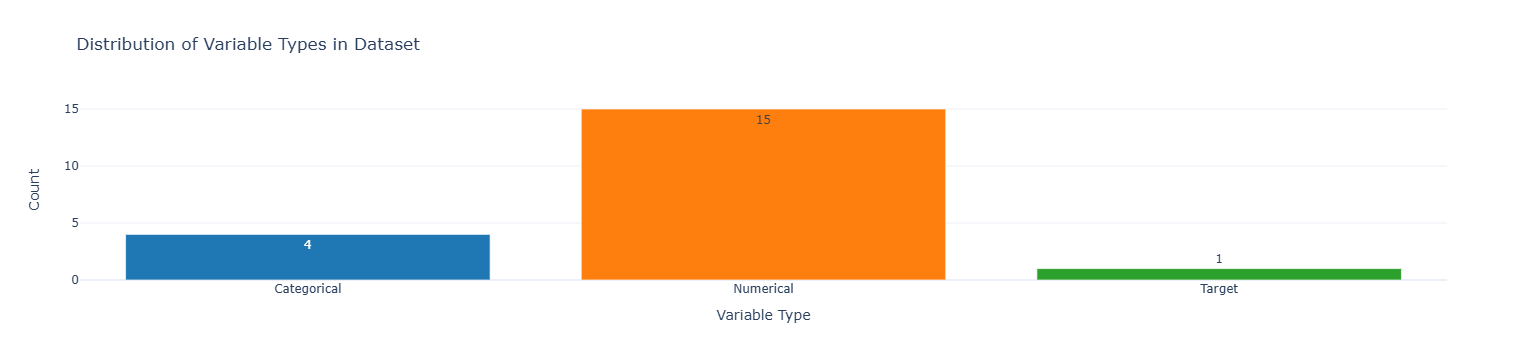

In [12]:
import plotly.graph_objects as go

# Lists of variables
categorical_vars = ['State', 'International plan', 'Voice mail plan', 'Area code']
numerical_vars = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
target = ['churn']

# Data for plotting
variable_types = ['Categorical', 'Numerical', 'Target']
counts = [len(categorical_vars), len(numerical_vars), len(target)]

# Create bar chart
fig = go.Figure(data=[go.Bar(
    x=variable_types,
    y=counts,
    text=counts,
    textposition='auto',
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for each bar
)])

# Customize layout
fig.update_layout(
    title='Distribution of Variable Types in Dataset',
    xaxis_title='Variable Type',
    yaxis_title='Count',
    template='plotly_white'
)

# Show plot
fig.show()


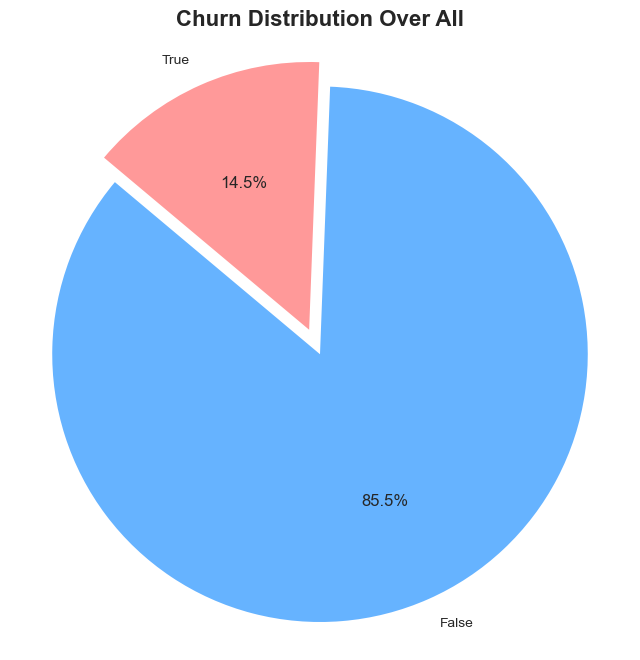

In [13]:
# Data
labels = ['False', 'True']  # Replace with actual labels
telecom_combined = pd.concat([telecom_train, telecom_test], axis=0, ignore_index=True)

sizes = telecom_combined ['Churn'].value_counts()  # Adjust to match your dataset
colors = ['#66B3FF', '#FF9999']  # Blue for False, Pink for True
explode = (0, 0.1)  # Explode only the 'True' slice

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=False
)

plt.title('Churn Distribution Over All', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()


Churn rate of telecom company is around 14.5%, Meaning around 14.5% of the subscribers left the company during given interval.<br>

A churn rate of 15.4% (churn) versus 85.5% (non-churn) indicates an <b>imbalanced dataset</b>. In this scenario, the non-churn class is approximately 5.55 times larger than the churn class. 

<span style="color:purple; font-size:15px"><b>Count Plot by Churn </b> </span><br>


In [14]:
# Loop through each numerical column and create an interactive histogram by Churn
for col in numerical_vars:
    fig = px.histogram(
        telecom_train,
        x=col,
        color="Churn",  # Color the bars based on Churn status
        title=f'Histogram of {col} by Churn',
        color_discrete_sequence=px.colors.qualitative.Set2,  # Use Set2 color palette
        barmode="stack",  # Stack bars for Churn
        nbins=20  # Set number of bins for the histogram
    )
    
    # Add white borders to the bars
    fig.update_traces(marker=dict(line=dict(color="white", width=1)))  # Set white borders for bars
    
    # Adjust layout for better presentation
    fig.update_layout(
        title=f'Histogram of {col} by Churn',
        xaxis_title=col,
        yaxis_title='Count',
        legend_title="Churn",
        template="plotly_white"  # Use the white template for a clean look
    )
    
    # Show the plot
    fig.show()


In [15]:
# Loop through categorical variables and create count plots
for col in categorical_vars:
    fig = px.histogram(
        telecom_train,
        x=col,
        color="Churn",
        title=f'Count of {col} by Churn',
        color_discrete_sequence=px.colors.qualitative.Set2,  # Use Set2 palette
        barmode="stack"  # Stack bars by Churn
    )
    
    # Add white borders to the bars
    fig.update_traces(marker=dict(line=dict(color="white", width=1)))  # Set white borders for bars
    
    # Adjust layout for better presentation
    fig.update_layout(
        title=f'Count of {col} by Churn',
        xaxis_title=col,
        yaxis_title='Count',
        legend_title="Churn",
        template="plotly_white"  # Use the white template for a clean look
    )
    
    # Show the plot
    fig.show()


<span style="color:purple; font-size:15px"><b>OUTLIERS </b> </span><br>


In [16]:
# Set up the number of columns for the grid layout
num_cols = 4  # Number of columns per row
num_rows = math.ceil(len(numerical_vars) / num_cols)  # Calculate number of rows

# Create a grid layout with subplots
figures = []

# Loop through each numerical column and create an interactive boxplot
for col in numerical_vars:
    fig = px.box(telecom_train, y=col, title=f'Boxplot of {col}', color_discrete_sequence=["blue"])
    figures.append(fig)

# Display all boxplots interactively
for fig in figures:
    fig.show()


# <a id='3'>3. Data Preparation</a>

## [3.1 Data Cleaning](#3)


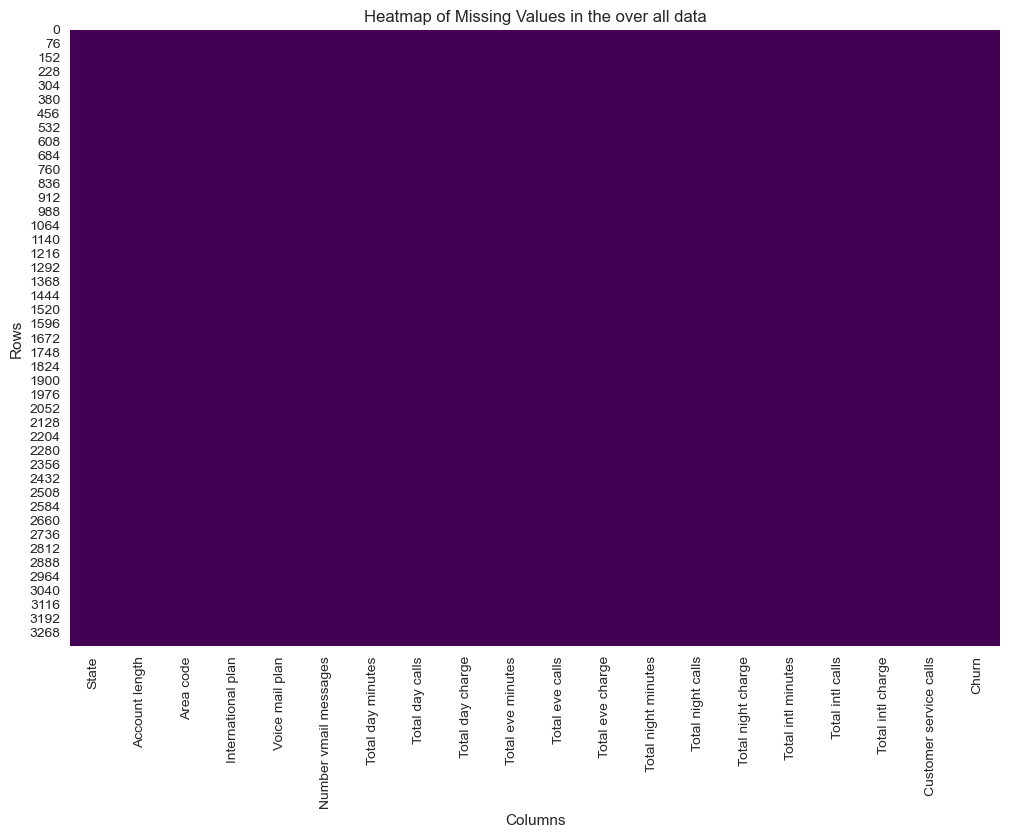

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(telecom_combined.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in the over all data')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [18]:
# Check for duplicates
duplicate_count = telecom_combined.duplicated().sum()
print(f'Number of duplicate records: {duplicate_count}')


Number of duplicate records: 0


**Data Quality Assessment**

- **Redundancy:** No duplicate records detected.
- **Outliers:** All values fall within expected ranges; no anomalies found.(according to boxplots) 
- **Missing Values:** Dataset is complete with no missing entries.

Conclusion: The dataset is clean and ready for analysis.


## [3.2 Feature engineering](#3)


# 💰 Creating a New Feature: **Total Monthly Charges**

We created a new feature called **Total Monthly Charges** to provide a comprehensive view of the customer's monthly spending. This feature is calculated as the sum of all charges for day, evening, night, and international calls:

Total Monthly Charges
=
Total Day Charge
+
Total Eve Charge
+
Total Night Charge
+
Total Intl Charge

### 🛠 **Purpose**:
- This feature consolidates the total spending into a single metric.
- It simplifies analysis by providing an overall view of customer expenses.

---

### ✅ **Outcome**:
The new feature **Total Monthly Charges** has been successfully added to the dataset, allowing us to better understand customer spending behavior. 🎉


In [19]:
# Calculate total charges per month (sum of all charges in one month)
telecom_combined['Total Monthly Charges'] = (telecom_combined['Total day charge'] + 
                                             telecom_combined['Total eve charge'] + 
                                             telecom_combined['Total night charge'])
telecom_combined



State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  ...  Total eve charge  \
0                45.07              197.4  ...             16.78   
1                27.47              195.5  ...             16.62   
2                41.38              121.2  ...             10.30   
3                50.90               61.9  ...              5.26   
4                28.34              148.3  ...             12.61   
...                ...                ...  ...               ...   
3328             23.31              155.7  ...             13.23   
3329             14.21              203.9  ...             17.33   
3330             32.96               85.0  ...              7.23   
3331             28.87              197.7  ...             16.80   
3332             36.35              159.6  ...             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7               3.11   
3329                 8.1                 3               2.19   
3330                13.2                 8               3.56   
333

## [3.3 Data Transformation](#3)


# 📊 Telecom Dataset Transformation For Decision Tree Classifier & Random Forest Classifier 

We will apply the following preprocessing steps to prepare the telecom dataset for machine learning:

## 🟢 Step 1: Feature Classification
1. **Account Length**:
   - Categorized into **Short-term (1)**, **Mid-term (2)**, and **Long-term (3)** based on statistical quantiles.<br>
   
   
2. **Customer Service Calls**:
   - Categorized into **Few (1)**, **Moderate (2)**, and **Frequent (3)** using quantiles.

## 🟦 Step 2: Area Code Transformation
- Encoded the **Area Code** feature into integers **1**, **2**, and **3** for simplicity.

## 🟨 Step 3: State Encoding
- Converted the **State** feature from string labels to numerical values using `LabelEncoder`.

## 🟧 Step 4: Binary Encoding
- Transformed categorical columns (**International Plan**, **Voice Mail Plan**, **Churn**) into binary values:
  - `Yes → 1`, `No → 0`.

## 🔵 Step 5: Min-Max Scaling
- Scaled all numerical features to a range of **[0, 1]** to standardize their magnitudes.

---

### ✅ **Result**:
The dataset is now clean and  scaled 🎉


#Data transformation for logistic regression , SVM and GBM 

In [20]:
telecom_standardscaler= telecom_combined.copy()  # Create a copy of the DataFrame for scaling

# Step 1: Drop the specified columns
columns_to_drop = ['Total day charge', 'Total night charge', 'Total eve charge', 
                   
                   'Total intl charge' ,'Number vmail messages','Area code', 'State']

# Drop the selected columns
telecom_standardscaler = telecom_standardscaler.drop(columns=columns_to_drop)

In [21]:
telecom_standardscaler

Account length International plan Voice mail plan  Total day minutes  \
0                128                 No             Yes              265.1   
1                107                 No             Yes              161.6   
2                137                 No              No              243.4   
3                 84                Yes              No              299.4   
4                 75                Yes              No              166.7   
...              ...                ...             ...                ...   
3328             114                 No             Yes              137.1   
3329             106                 No             Yes               83.6   
3330              60                 No              No              193.9   
3331             159                 No              No              169.8   
3332             184                Yes              No              213.8   

      Total day calls  Total eve minutes  Total eve calls  \
0                 110              197.4               99   
1                 123              195.5              103   
2                 114              121.2              110   
3                  71               61.9               88   
4                 113              148.3              122   
...               ...                ...              ...   
3328               88              155.7              125   
3329              131              203.9              131   
3330              118               85.0              110   
3331              114              197.7              105   
3332              105              159.6               84   

      Total night minutes  Total night calls  Total intl minutes  \
0                   244.7                 91                10.0   
1                   254.4                103                13.7   
2                   162.6                104                12.2   
3                   196.9                 89                 6.6   
4                   186.9                121                10.1   
...                   ...                ...                 ...   
3328                247.6                 94                11.5   
3329                229.5                 73                 8.1   
3330                210.1                134                13.2   
3331                193.7                 82                11.6   
3332                139.2                137                 5.0   

      Total intl calls  Customer service calls  Churn  Total Monthly Charges  
0                    3                       1  False                  72.86  
1                    3                       1  False                  55.54  
2                    5                       0  False                  59.00  
3                    7                       2  False                  65.02  
4                    3                       3  False                  49.36  
...                ...                     ...    ...                    ...  
3328                 7                       2  False                  47.68  
3329                 3                       1  False                  41.87  
3330                 8                       3  False                  49.64  
3331                 4                       1  False                  54.39  
3332                10                       2  False                  56.18  

[3333 rows x 14 columns]

In [22]:
telecom_combined_standardscaler= telecom_standardscaler.copy()  # Create a copy of the DataFrame for scaling
telecom_combined_standardscaler['International plan'] = telecom_combined_standardscaler['International plan'].map({'Yes': 1, 'No': 0})
telecom_combined_standardscaler['Voice mail plan'] = telecom_combined_standardscaler['Voice mail plan'].map({'Yes': 1, 'No': 0})
telecom_combined_standardscaler['Churn'] = telecom_combined_standardscaler['Churn'].map({True: 1, False: 0})


In [23]:
telecom_combined_standardscaler.columns = telecom_combined_standardscaler.columns.str.replace('\xa0', ' ', regex=True).str.strip()


In [24]:
print(telecom_combined_standardscaler.columns)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'Churn', 'Total Monthly Charges'],
      dtype='object')


In [25]:
print(list(telecom_combined_standardscaler.columns))


['Account length', 'International plan', 'Voice mail plan', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls', 'Churn', 'Total Monthly Charges']


In [26]:
numeric_columns = [
    'Account length', 'Total day minutes', 'Total day calls', 
    'Total eve minutes', 'Total eve calls', 'Total night minutes',
    'Total night calls', 'Total intl minutes', 'Total intl calls',
    'Customer service calls', 'Total Monthly Charges'
]
scaler = StandardScaler()
telecom_combined_standardscaler[numeric_columns] = scaler.fit_transform(telecom_combined_standardscaler[numeric_columns])


In [27]:
telecom_combined_standardscaler

Account length  International plan  Voice mail plan  Total day minutes  \
0           0.676489                   0                1           1.566767   
1           0.149065                   0                1          -0.333738   
2           0.902529                   0                0           1.168304   
3          -0.428590                   1                0           2.196596   
4          -0.654629                   1                0          -0.240090   
...              ...                 ...              ...                ...   
3328        0.324873                   0                1          -0.783616   
3329        0.123950                   0                1          -1.766002   
3330       -1.031361                   0                0           0.259367   
3331        1.455068                   0                0          -0.183166   
3332        2.082955                   1                0           0.624778   

      Total day calls  Total eve minutes  Total eve calls  \
0            0.476643          -0.070610        -0.055940   
1            1.124503          -0.108080         0.144867   
2            0.675985          -1.573383         0.496279   
3           -1.466936          -2.742865        -0.608159   
4            0.626149          -1.038932         1.098699   
...               ...                ...              ...   
3328        -0.619735          -0.892994         1.249304   
3329         1.523186           0.057580         1.550515   
3330         0.875326          -2.287299         0.496279   
3331         0.675985          -0.064693         0.245270   
3332         0.227466          -0.816080        -0.808966   

      Total night minutes  Total night calls  Total intl minutes  \
0                0.866743          -0.465494           -0.085008   
1                1.058571           0.147825            1.240482   
2               -0.756869           0.198935            0.703121   
3               -0.078551          -0.567714           -1.303026   
4               -0.276311           1.067803           -0.049184   
...                   ...                ...                 ...   
3328             0.924094          -0.312165            0.452353   
3329             0.566148          -1.385473           -0.765665   
3330             0.182492           1.732232            1.061361   
3331            -0.141834          -0.925484            0.488177   
3332            -1.219628           1.885562           -1.876211   

      Total intl calls  Customer service calls  Churn  Total Monthly Charges  
0            -0.601195               -0.427932      0               1.542481  
1            -0.601195               -0.427932      0              -0.109207  
2             0.211534               -1.188218      0               0.220749  
3             1.024263                0.332354      0               0.794835  
4            -0.601195                1.092641      0              -0.698551  
...                ...                     ...    ...                    ...  
3328          1.024263                0.332354      0              -0.858761  
3329         -0.601195               -0.427932      0              -1.412820  
3330          1.430627                1.092641      0              -0.671849  
3331         -0.194831               -0.427932      0              -0.218875  
3332          2.243356                0.332354      0              -0.048175  

[3333 rows x 14 columns]

In [28]:
telecom_combined_Scaled = telecom_combined.copy()  # Create a copy of the DataFrame for scaling

# Step 1.1: Change 'Account length' into Categories (Statistical Quantile-Based)
quantiles_account_length = telecom_combined_Scaled['Account length'].quantile([0.33, 0.66])

# Create categories based on quantiles
def categorize_account_length(value):
    if value <= quantiles_account_length[0.33]:
        return 1  # Short-term
    elif value <= quantiles_account_length[0.66]:
        return 2  # Mid-term
    else:
        return 3  # Long-term

telecom_combined_Scaled['Account length'] = telecom_combined_Scaled['Account length'].apply(categorize_account_length)

# Step 1.2: Change 'Customer service calls' into Categories
quantiles_customer_service_calls = telecom_combined_Scaled['Customer service calls'].quantile([0.33, 0.66])

def categorize_customer_service_calls(value):
    if value <= quantiles_customer_service_calls[0.33]:
        return 1  # Few
    elif value <= quantiles_customer_service_calls[0.66]:
        return 2  # Moderate
    else:
        return 3  # Frequent

telecom_combined_Scaled['Customer service calls'] = telecom_combined_Scaled['Customer service calls'].apply(categorize_customer_service_calls)

# Step 2: Change 'Area code' into 1, 2, 3
area_code_mapping = {code: idx+1 for idx, code in enumerate(sorted(telecom_combined_Scaled['Area code'].unique()))}
telecom_combined_Scaled['Area code'] = telecom_combined_Scaled['Area code'].map(area_code_mapping)

# Step 3: Change 'State' from String to Numerical
label_encoder_state = LabelEncoder()
telecom_combined_Scaled['State'] = label_encoder_state.fit_transform(telecom_combined_Scaled['State'])

# Step 4: Encode Categorical Columns into Binary (0/1)
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']
label_encoder = LabelEncoder()
for col in categorical_columns:
    telecom_combined_Scaled[col] = label_encoder.fit_transform(telecom_combined_Scaled[col])

# Step 5: Min-Max Scale the Numerical Data
numerical_columns = ['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge','Total Monthly Charges']
scaler = MinMaxScaler()
telecom_combined_Scaled[numerical_columns] = scaler.fit_transform(telecom_combined_Scaled[numerical_columns])



In [29]:
telecom_combined_Scaled

State  Account length  Area code  International plan  Voice mail plan  \
0        16               3          2                   0                1   
1        35               2          2                   0                1   
2        31               3          2                   0                0   
3        35               1          1                   1                0   
4        36               1          2                   1                0   
...     ...             ...        ...                 ...              ...   
3328     48               2          2                   0                1   
3329      1               2          1                   0                1   
3330     46               1          2                   0                0   
3331     49               3          2                   0                0   
3332      6               3          3                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                  0.490196           0.755701         0.666667   
1                  0.509804           0.460661         0.745455   
2                  0.000000           0.693843         0.690909   
3                  0.000000           0.853478         0.430303   
4                  0.000000           0.475200         0.684848   
...                     ...                ...              ...   
3328               0.509804           0.390821         0.533333   
3329               0.568627           0.238312         0.793939   
3330               0.000000           0.552737         0.715152   
3331               0.000000           0.484036         0.690909   
3332               0.000000           0.609464         0.636364   

      Total day charge  Total eve minutes  ...  Total eve charge  \
0             0.755701           0.542755  ...          0.542866   
1             0.460597           0.537531  ...          0.537690   
2             0.693830           0.333242  ...          0.333225   
3             0.853454           0.170195  ...          0.170171   
4             0.475184           0.407754  ...          0.407959   
...                ...                ...  ...               ...   
3328          0.390845           0.428100  ...          0.428017   
3329          0.238263           0.560627  ...          0.560660   
3330          0.552649           0.233709  ...          0.233905   
3331          0.484071           0.543580  ...          0.543513   
3332          0.609490           0.438823  ...          0.439016   

      Total night minutes  Total night calls  Total night charge  \
0                0.595750           0.408451            0.595935   
1                0.621840           0.492958            0.622236   
2                0.374933           0.500000            0.375374   
3                0.467187           0.394366            0.467424   
4                0.440290           0.619718            0.440526   
...                   ...                ...                 ...   
3328             0.603550           0.429577            0.603706   
3329             0.554868           0.281690            0.555290   
3330             0.502690           0.711268            0.502690   
3331             0.458580           0.345070            0.459056   
3332             0.311996           0.732394            0.312014   

      Total intl minutes  Total intl calls  Total intl charge  \
0                  0.500              0.15           0.500000   
1                  0.685              0.15           0.685185   
2                  0.610              0.25           0.609259   
3                  0.330              0.35           0.329630   
4                  0.505              0.15           0.505556   
...                  ...               ...                ...   
3328               0.575              0.35           0.575926   
3329               0.405              0.15           0.405556   
3330               0.660         

In [30]:
telecom_combined_Scaled.dtypes


State                       int32
Account length              int64
Area code                   int64
International plan          int32
Voice mail plan             int32
Number vmail messages     float64
Total day minutes         float64
Total day calls           float64
Total day charge          float64
Total eve minutes         float64
Total eve calls           float64
Total eve charge          float64
Total night minutes       float64
Total night calls         float64
Total night charge        float64
Total intl minutes        float64
Total intl calls          float64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
Total Monthly Charges     float64
dtype: object

In [31]:
print(telecom_combined_Scaled.isnull().sum())


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Total Monthly Charges     0
dtype: int64


## [3.4 Feature Selection](#3)


# ✨ Feature Selection for Telecom Dataset

In this step, we will perform **feature selection** to retain the most relevant variables and eliminate redundant or noisy ones. Below is a summary of the planned process:

---

## 📊 **Correlated Variables**
For highly correlated pairs of variables (Pearson correlation ≥ 0.95), we will retain one variable and drop the other based on interpretability and relevance to the model. Here's the planned decision:

| **Keep**                 | **Drop**                |
|--------------------------|-------------------------|
| `Total day minutes`      | `Total day charge`      |
| `Total night minutes`    | `Total night charge`    |
| `Total eve minutes`      | `Total eve charge`      |
| `Total intl minutes`     | `Total intl charge`     |
| `Voice mail plan`        | `Number vmail messages` |

### ✍ **Reasoning**:
- **Minutes vs. Charges**:
  - **Minutes** directly represent customer behavior, while **Charges** are derived metrics.
  - Retaining minutes will allow for raw and actionable insights without redundancy.
- **Voice Mail Plan**:
  - We will retain it as it provides categorical information, while `Number vmail messages` is dependent on this variable.

---

## ❌ **Dropped Features**
### 🗺️ **Noise-Causing Variables**:
- **`Area code`** and **`State`**:
  - These features are weakly or not correlated with the target variable (`Churn`) and other predictors.
  - Including them might introduce noise and reduce model performance.

---

## 🎯 **Conclusion**
By eliminating redundant and irrelevant features:
1. We will reduce noise and multicollinearity in the dataset.
2. Improve model interpretability and performance.
3. Ensure the dataset focuses on variables that contribute meaningfully to predicting **Churn**.



In [32]:
# Calculate the correlation matrix for all numerical variables
correlation_matrix = telecom_combined_Scaled.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.index,
                   colorscale='Viridis',
                   colorbar=dict(title='Pearson Correlation Coefficients'),
                   hoverongaps=False))

# Update layout for better visualization
fig.update_layout(
    title='Correlation Matrix of All Variables',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    autosize=True,
    height=1000,  # Increase height
    width=1000    # Increase width
)

# Show the interactive plot
fig.show()


In [33]:
# Create interactive barplot of Pearson correlation coefficients with target 'Churn'
correlation_with_target = telecom_combined_Scaled.corr()['Churn'].sort_values()

# Create an interactive barplot using a compatible colorscale
fig = px.bar(
    x=correlation_with_target.index,
    y=correlation_with_target.values,
    labels={"x": "Features", "y": "Pearson Correlation Coefficient"},
    title="Correlation of Features with Target (Churn)",
    color=correlation_with_target.values,
    color_continuous_scale="Viridis"  # Replaced 'coolwarm' with 'Viridis'
)

# Update layout for better visualization
fig.update_layout(
    xaxis=dict(title="Features", tickangle=45),
    yaxis=dict(title="Pearson Correlation Coefficient"),
    coloraxis_colorbar=dict(title="Correlation Coefficient"),
    height=600, width=1000
)

# Show the plot
fig.show()


In [34]:
telecom_combined_Reduced = telecom_combined_Scaled.copy()  # Create a copy of the DataFrame for scaling

# Step 1: Drop the specified columns
columns_to_drop = ['Total day charge', 'Total night charge', 'Total eve charge', 
                   
                   'Total intl charge' ,'Number vmail messages','Area code', 'State']

# Drop the selected columns
telecom_combined_Reduced = telecom_combined_Reduced.drop(columns=columns_to_drop)

In [35]:
telecom_combined_Reduced

Account length  International plan  Voice mail plan  Total day minutes  \
0                  3                   0                1           0.755701   
1                  2                   0                1           0.460661   
2                  3                   0                0           0.693843   
3                  1                   1                0           0.853478   
4                  1                   1                0           0.475200   
...              ...                 ...              ...                ...   
3328               2                   0                1           0.390821   
3329               2                   0                1           0.238312   
3330               1                   0                0           0.552737   
3331               3                   0                0           0.484036   
3332               3                   1                0           0.609464   

      Total day calls  Total eve minutes  Total eve calls  \
0            0.666667           0.542755         0.582353   
1            0.745455           0.537531         0.605882   
2            0.690909           0.333242         0.647059   
3            0.430303           0.170195         0.517647   
4            0.684848           0.407754         0.717647   
...               ...                ...              ...   
3328         0.533333           0.428100         0.735294   
3329         0.793939           0.560627         0.770588   
3330         0.715152           0.233709         0.647059   
3331         0.690909           0.543580         0.617647   
3332         0.636364           0.438823         0.494118   

      Total night minutes  Total night calls  Total intl minutes  \
0                0.595750           0.408451               0.500   
1                0.621840           0.492958               0.685   
2                0.374933           0.500000               0.610   
3                0.467187           0.394366               0.330   
4                0.440290           0.619718               0.505   
...                   ...                ...                 ...   
3328             0.603550           0.429577               0.575   
3329             0.554868           0.281690               0.405   
3330             0.502690           0.711268               0.660   
3331             0.458580           0.345070               0.580   
3332             0.311996           0.732394               0.250   

      Total intl calls  Customer service calls  Churn  Total Monthly Charges  
0                 0.15                       1      0               0.728575  
1                 0.15                       1      0               0.489942  
2                 0.25                       1      0               0.537614  
3                 0.35                       2      0               0.620557  
4                 0.15                       3      0               0.404795  
...                ...                     ...    ...                    ...  
3328              0.35                       2      0               0.381648  
3329              0.15                       1      0               0.301598  
3330              0.40                       3      0               0.408653  
3331              0.20                       1      0               0.474098  
3332              0.50                       2      0               0.498760  

[3333 rows x 14 columns]

## [3.5  Data Spilliting and Balancing with SMOTE & ENN](#3)


# 🧪 Data Splitting, SMOTE, and ENN

In this step, we prepare the data by **splitting**, **balancing**, and **cleaning** the dataset to ensure fair model training.

---

## 📂 **Data Splitting**

- **Features (`X`)**: Independent variables.
- **Target (`y`)**: Dependent variable, `Churn`.
- **Split Ratio**: 80% training, 20% testing.
- **Stratification**: Maintains class distribution across splits.

---

## 🔄 **SMOTE: Synthetic Minority Oversampling Technique**

- **Purpose**: Balances the dataset by generating synthetic samples for the minority class (`Churn=1`).
- **How**: Creates new samples by interpolating between existing minority samples.

---

## ✂️ **ENN: Edited Nearest Neighbors**

- **Purpose**: Removes noisy or borderline samples after oversampling.
- **How**: Deletes samples that disagree with the majority of their nearest neighbors.

---

## 🎯 **Final Outcome**

By applying **SMOTE + ENN**, the training dataset becomes balanced, reducing bias and improving model performance.



In [36]:
# Separate features (X) and target (y)
X = telecom_combined_Reduced.drop(columns=['Churn'])
y = telecom_combined_Reduced['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE and ENN
smote = SMOTE(sampling_strategy='minority', random_state=42)
enn = EditedNearestNeighbours(n_neighbors=11)

# Apply SMOTE to balance the minority class
X_res, y_res = smote.fit_resample(X_train, y_train)

# Apply ENN to clean the data
X_res, y_res = enn.fit_resample(X_res, y_res)

# Check the class distribution after the first iteration
class_distribution = Counter(y_res)
print(f"Class distribution after SMOTE + ENN (1st iteration): {class_distribution}")

# Repeat the process iteratively until classes are balanced
while min(class_distribution.values()) != max(class_distribution.values()):
    # Apply SMOTE again
    X_res, y_res = smote.fit_resample(X_res, y_res)

    # Apply ENN to clean the data further
    X_res, y_res = enn.fit_resample(X_res, y_res)

    # Check the updated class distribution
    class_distribution = Counter(y_res)
    print(f"Class distribution after SMOTE + ENN iteration: {class_distribution}")

    # Remove duplicates after each iteration
    X_res = pd.DataFrame(X_res).drop_duplicates()
    y_res = y_res[X_res.index]

# Combine the resampled data into a new balanced DataFrame
telecom_combined_Balanced = pd.DataFrame(X_res, columns=X.columns)
telecom_combined_Balanced['Churn'] = y_res

# Verify the final class distribution
print("Final class distribution after SMOTE + ENN:")
print(telecom_combined_Balanced['Churn'].value_counts())


Class distribution after SMOTE + ENN (1st iteration): Counter({0: 2280, 1: 1343})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2181})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2255})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2265})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2279})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2280})
Final class distribution after SMOTE + ENN:
Churn
0    2280
1    2280
Name: count, dtype: int64


In [37]:
telecom_combined_Balanced

Account length  International plan  Voice mail plan  Total day minutes  \
0                  1                   0                0           0.648233   
1                  3                   0                1           0.632269   
2                  1                   0                1           0.639111   
3                  3                   0                0           0.464652   
4                  3                   0                0           0.352623   
...              ...                 ...              ...                ...   
4555               1                   0                0           0.369995   
4556               1                   0                0           0.843280   
4557               1                   0                0           0.479751   
4558               3                   0                0           0.817722   
4559               2                   0                0           0.807840   

      Total day calls  Total eve minutes  Total eve calls  \
0            0.406061           0.681881         0.676471   
1            0.866667           0.579049         0.676471   
2            0.642424           0.521309         0.588235   
3            0.563636           0.560627         0.600000   
4            0.836364           0.683255         0.617647   
...               ...                ...              ...   
4555         0.523550           0.485485         0.475030   
4556         0.542500           0.564644         0.654955   
4557         0.697059           0.391295         0.709498   
4558         0.653467           0.652150         0.770985   
4559         0.562143           0.595651         0.518189   

      Total night minutes  Total night calls  Total intl minutes  \
0                0.102743           0.535211            0.390000   
1                0.534158           0.535211            0.620000   
2                0.536848           0.295775            0.490000   
3                0.365250           0.535211            0.755000   
4                0.662722           0.316901            0.665000   
...                   ...                ...                 ...   
4555             0.550030           0.380635            0.369988   
4556             0.528125           0.552625            0.499667   
4557             0.611725           0.579162            0.524271   
4558             0.468662           0.394928            0.452761   
4559             0.523460           0.601953            0.679922   

      Total intl calls  Customer service calls  Total Monthly Charges  Churn  
0             0.300000                       1               0.585836      0  
1             0.450000                       1               0.628410      0  
2             0.200000                       1               0.610085      0  
3             0.200000                       2               0.443786      0  
4             0.200000                       1               0.472582      0  
...                ...                     ...                    ...    ...  
4555          0.165804                       3               0.376728      1  
4556          0.248988                       1               0.794232      1  
4557          0.146722                       3               0.441071      1  
4558          0.161078                       1               0.796819      1  
4559          0.405383                       2               0.777151      1  

[4560 rows x 14 columns]

In [38]:
X=telecom_combined_Balanced.drop('Churn', axis=1)
y=telecom_combined_Balanced['Churn']
X_train_bal,X_test_bal,y_train_bal,y_test_bal=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X = telecom_combined_standardscaler.drop(columns=['Churn'])
y = telecom_combined_standardscaler['Churn']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE and ENN
smote = SMOTE(sampling_strategy='minority', random_state=42)
enn = EditedNearestNeighbours(n_neighbors=11)

# Apply SMOTE to balance the minority class
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# Apply ENN to clean the data
X_balanced, y_balanced = enn.fit_resample(X_balanced, y_balanced)

# Check the class distribution after the first iteration
class_counts = Counter(y_balanced)
print(f"Class distribution after SMOTE + ENN (1st iteration): {class_counts}")

# Repeat the process iteratively until classes are balanced
while min(class_counts.values()) != max(class_counts.values()):
    # Apply SMOTE again
    X_balanced, y_balanced = smote.fit_resample(X_balanced, y_balanced)

    # Apply ENN to clean the data further
    X_balanced, y_balanced = enn.fit_resample(X_balanced, y_balanced)

    # Check the updated class distribution
    class_counts = Counter(y_balanced)
    print(f"Class distribution after SMOTE + ENN iteration: {class_counts}")

    # Remove duplicates after each iteration
    X_balanced = pd.DataFrame(X_balanced).drop_duplicates()
    y_balanced = y_balanced[X_balanced.index]

# Combine the resampled data into a new balanced DataFrame
telecom_balanced = pd.DataFrame(X_balanced, columns=X.columns)
telecom_balanced['Churn'] = y_balanced

# Verify the final class distribution
print("Final class distribution after SMOTE + ENN:")
print(telecom_balanced['Churn'].value_counts())


Class distribution after SMOTE + ENN (1st iteration): Counter({0: 2280, 1: 1497})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2163})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2258})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2270})
Class distribution after SMOTE + ENN iteration: Counter({0: 2280, 1: 2280})
Final class distribution after SMOTE + ENN:
Churn
0    2280
1    2280
Name: count, dtype: int64


In [40]:
X=telecom_balanced.drop('Churn', axis=1)
y=telecom_balanced['Churn']
X_train_lin,X_test_lin,y_train_lin,y_test_lin=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_test_lin

Account length  International plan  Voice mail plan  Total day minutes  \
471        -0.805322                   0                0          -0.814832   
2646        0.143479                   0                0           1.426951   
23          0.626259                   1                0           0.327307   
3477        0.522755                   0                0          -0.345937   
135        -0.026743                   0                0          -0.893790   
...              ...                 ...              ...                ...   
2115       -0.679745                   0                0          -0.265797   
4348       -0.943787                   0                0           1.606951   
408        -0.654629                   0                1           0.338325   
170        -1.860171                   0                0          -1.784365   
540         1.002990                   0                1           0.141847   

      Total day calls  Total eve minutes  Total eve calls  \
471          0.028125           0.732053         1.199103   
2646         0.433651           0.459033        -1.188926   
23           1.274009           0.897713         0.596682   
3477        -0.408380           0.171568         0.430038   
135          0.376972          -0.488704        -0.959571   
...               ...                ...              ...   
2115         0.974997          -0.048916         0.295472   
4348         1.019636           0.153033         1.090416   
408          0.327137           1.566270         1.600716   
170          0.227466           0.059552        -0.055940   
540         -0.071546           0.797134         0.797489   

      Total night minutes  Total night calls  Total intl minutes  \
471             -0.104260           0.096715            0.129936   
2646             1.136965          -0.392339            0.758140   
23               1.669650           0.198935            0.810593   
3477            -2.175983           0.364526           -0.473371   
135             -2.198542          -0.976594           -2.126979   
...                   ...                ...                 ...   
2115             0.150851           0.096715           -0.156656   
4348             0.593321          -1.362814           -0.395278   
408             -1.409478          -1.385473            0.380704   
170              0.461335           1.118913           -0.407425   
540              0.566148           0.250045            0.094112   

      Total intl calls  Customer service calls  Total Monthly Charges  
471          -1.007560               -0.427932              -0.441071  
2646         -0.271858                0.784555               1.695064  
23            1.430627                0.332354               1.019891  
3477          0.260279                2.522015              -0.707116  
135          -0.194831               -0.427932              -1.466223  
...                ...                     ...                    ...  
2115         -0.601195               -0.427932              -0.222689  
4348         -0.523459               -0.282492               1.610019  
408           1.024263               -0.427932               0.635578  
170          -0.194831               -0.427932              -1.450965  
540           0.211534                1.092641               0.576453  

[912 rows x 13 columns]

# <a id='4'>4. Modeling</a>

## [4.1  DSO1:Build and evaluate advanced machine learning models to determine the best-performing model, analyze key churn-driving features, and design data-driven retention strategies.  ](#4)

### [4.1.1 Logistic Regression Algorithm](#4)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],       # Régularisation
    'penalty': ['l1', 'l2'],      # Type de pénalité
    'solver': ['liblinear', 'saga']  # Solveurs compatibles
}

In [43]:
# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Mesure à optimiser
    cv=5,                # Nombre de folds pour la validation croisée
    verbose=1,           # Afficher les détails
    n_jobs=-1            # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche
grid_search.fit(X_train_lin, y_train_lin)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [44]:
best_model = grid_search.best_estimator_

### [4.1.2  Gradient Boosting Machine (GBM) Algorithm](#4)


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les hyperparamètres à optimiser pour GBM
param_grid = {
    'n_estimators': [50, 100, 150],         # Nombre d'arbres
    'max_depth': range(1, 15),             # Profondeur maximale
    'learning_rate': [0.01, 0.1, 0.2],     # Taux d'apprentissage
    'subsample': [0.8, 1.0],               # Échantillonnage des données
}

# Modèle GBM
model = GradientBoostingClassifier(random_state=42)

# Recherche de grille pour l'optimisation des hyperparamètres
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_bal, y_train_bal)

# Meilleurs hyperparamètres
best_params = grid.best_params_
print("Meilleurs paramètres :", best_params)

# Modèle final avec les meilleurs hyperparamètres
GradientBoosting = GradientBoostingClassifier(**best_params, random_state=42)
GradientBoosting.fit(X_train_bal, y_train_bal)



Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}


GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=150,
                           random_state=42)

### [4.1.3  Support Vector Classifier (SVC) Algorithm](#4)

In [46]:
from sklearn.svm import SVC

# Initialiser et entraîner le modèle
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_lin, y_train_lin)

SVC(probability=True, random_state=42)

### [4.1.4  XGBoost Algorithm](#4)

In [47]:
# XGBoost parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter tuning using GridSearchCV
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train_bal, y_train_bal)

# Best parameters
best_params = grid.best_params_
print("Best Parameters:", best_params)

# Train final XGBoost model with the best parameters
xgb_best = xgb.XGBClassifier(**best_params, random_state=42)
xgb_best.fit(X_train_bal , y_train_bal)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\chaim\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[19:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### [4.1.5  AdaBoost Algorithm](#4)


In [48]:
# Define the parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0],  # Contribution of each weak learner
    'estimator__max_depth': [1, 2, 3]  # Depth of the weak learner (decision tree)
}

# Initialize AdaBoost classifier with a Decision Tree base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Use GridSearchCV to find the best parameters
grid = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the training data
grid.fit(X_train_bal, y_train_bal)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

### [4.1.6  Neutral Network Algorithm](#4)

In [49]:
neural_net_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
neural_net_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = neural_net_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

C:\Users\chaim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
67/67 - 4s - 66ms/step - accuracy: 0.8166 - loss: 0.4972 - val_accuracy: 0.8408 - val_loss: 0.4274
Epoch 2/50
67/67 - 0s - 7ms/step - accuracy: 0.8560 - loss: 0.4194 - val_accuracy: 0.8408 - val_loss: 0.4013
Epoch 3/50
67/67 - 0s - 6ms/step - accuracy: 0.8593 - loss: 0.3873 - val_accuracy: 0.8446 - val_loss: 0.3818
Epoch 4/50
67/67 - 0s - 7ms/step - accuracy: 0.8654 - loss: 0.3626 - val_accuracy: 0.8596 - val_loss: 0.3625
Epoch 5/50
67/67 - 0s - 6ms/step - accuracy: 0.8776 - loss: 0.3501 - val_accuracy: 0.8614 - val_loss: 0.3449
Epoch 6/50
67/67 - 1s - 8ms/step - accuracy: 0.8734 - loss: 0.3270 - val_accuracy: 0.8745 - val_loss: 0.3263
Epoch 7/50
67/67 - 0s - 7ms/step - accuracy: 0.8902 - loss: 0.3202 - val_accuracy: 0.8876 - val_loss: 0.3103
Epoch 8/50
67/67 - 1s - 11ms/step - accuracy: 0.8856 - loss: 0.3065 - val_accuracy: 0.8933 - val_loss: 0.3004
Epoch 9/50
67/67 - 1s - 8ms/step - accuracy: 0.8935 - loss: 0.3061 - val_accuracy: 0.8989 - val_loss: 0.2860
Epoch 10/50
67/67

## [4.2  DSO2: Build and optimize machine learning algorithms to forecast churn and cluster Costumers to interpret their behavior pattern](#4)


### [4.2.1 Decision Tree Classifier Algorithm](#4)


<span style="color:purple; font-size:15px"><b>Before Balancing with SMOTE & ENN  </b> </span><br>
  


In [50]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),

}

In [51]:

model = DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)


best_params = grid.best_params_
print("Meilleurs paramètres :", best_params)

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 6}


In [52]:
DecisionTree=DecisionTreeClassifier(**best_params)
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [53]:
train_score = DecisionTree.score(X_train, y_train)
test_score = DecisionTree.score(X_test, y_test)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9786196549137285
Test score = 0.9685157421289355


<span style="color:purple; font-size:15px"><b>After Balancing with SMOTE & ENN  </b> </span><br>
  


In [54]:

model = DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_bal, y_train_bal)


best_params2 = grid.best_params_
print("Meilleurs paramètres :", best_params2)

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 13}


In [55]:
DecisionTree_bal=DecisionTreeClassifier(**best_params2)
DecisionTree_bal.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', max_depth=13)

In [56]:
train_score = DecisionTree_bal.score(X_train_bal, y_train_bal)
test_score = DecisionTree_bal.score(X_test_bal, y_test_bal)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9958881578947368
Test score = 0.9802631578947368


## [4.2.2 Random Forest  Algorithm](#4)


<span style="color:purple; font-size:15px"><b>Before Balancing with SMOTE & ENN  </b> </span><br>
  


In [57]:
# Définir les hyperparamètres à optimiser pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],       # Nombre d'arbres dans la forêt
    'max_depth': range(1, 15),           # Profondeur maximale
    'criterion': ['gini', 'entropy'],    # Critères d'impureté
}

In [58]:
# Modèle Random Forest
model = RandomForestClassifier(random_state=42)

# Recherche de grille pour l'optimisation des hyperparamètres
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Meilleurs hyperparamètres
best_params3 = grid.best_params_
print("Meilleurs paramètres :", best_params3)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [59]:
# Modèle final avec les meilleurs hyperparamètres
RandomForest = RandomForestClassifier(**best_params3, random_state=42)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [60]:
# Scores d'entraînement et de test
train_score = RandomForest.score(X_train, y_train)
test_score = RandomForest.score(X_test, y_test)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9793698424606152
Test score = 0.974512743628186


<span style="color:purple; font-size:15px"><b>After Balancing with SMOTE & ENN </b> </span><br>


In [61]:
# Définir les hyperparamètres à optimiser pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],       # Nombre d'arbres dans la forêt
    'max_depth': range(1, 15),           # Profondeur maximale
    'criterion': ['gini', 'entropy'],    # Critères d'impureté
}

In [62]:
# Modèle Random Forest
model = RandomForestClassifier(random_state=42)

# Recherche de grille pour l'optimisation des hyperparamètres
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_bal, y_train_bal)

# Meilleurs hyperparamètres
best_params4 = grid.best_params_
print("Meilleurs paramètres :", best_params4)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 150}


In [63]:
# Modèle final avec les meilleurs hyperparamètres
RandomForest_bal = RandomForestClassifier(**best_params4, random_state=42)
RandomForest_bal.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=14, n_estimators=150, random_state=42)

In [64]:
# Scores d'entraînement et de test
train_score = RandomForest_bal.score(X_train_bal, y_train_bal)
test_score = RandomForest_bal.score(X_test_bal, y_test_bal)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9994517543859649
Test score = 0.9835526315789473


# <a id='5'>5.Evaluation </a>

<span style="color:purple; font-size:15px"><b>Evaluation Function
  </b> </span><br>


In [65]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from plotly.subplots import make_subplots
import plotly.graph_objs as go

def evaluate_model_interactive(model, X_train, X_test, y_train, y_test, threshold_plot=False):
    """
    Evaluates a trained machine learning model with interactive visualizations, excluding feature importance.

    Parameters:
        model: Trained model to evaluate.
        X_train: Training features.
        X_test: Test features.
        y_train: Training labels.
        y_test: Test labels.
        threshold_plot: Boolean to indicate whether to show threshold visualization.

    Returns:
        None
    """
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    # Print classification report and accuracy
    print(f'Algorithm: {type(model).__name__}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    model_roc_auc = roc_auc_score(y_test, y_proba)
    print(f"Area Under Curve (AUC): {model_roc_auc:.2f}\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Interactive Confusion Matrix Heatmap
    trace1 = go.Heatmap(
        z=conf_matrix,
        x=["Predicted: Not Churn", "Predicted: Churn"],
        y=["Actual: Not Churn", "Actual: Churn"],
        showscale=False,
        colorscale="Blues",
        name="Confusion Matrix"
    )

    # Interactive ROC Curve
    trace2 = go.Scatter(
        x=fpr, y=tpr,
        name=f"ROC Curve (AUC = {model_roc_auc:.2f})",
        line=dict(color='blue', width=2),
        hovertemplate='<b>FPR:</b> %{x}<br><b>TPR:</b> %{y}'
    )
    trace3 = go.Scatter(
        x=[0, 1], y=[0, 1],
        name="Random Chance",
        line=dict(color='red', dash='dash')
    )

    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            'Confusion Matrix',
            'Receiver Operating Characteristic (ROC)'
        )
    )
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)

    # Update layout with axis labels
    fig.update_layout(
        showlegend=False,
        title="Model Performance",
        autosize=False,
        height=700, width=1000,
        plot_bgcolor='rgba(240,240,240,0.95)',
        paper_bgcolor='rgba(240,240,240,0.95)',
    )
    fig["layout"]["xaxis1"].update(title="Predicted Labels")
    fig["layout"]["yaxis1"].update(title="Actual Labels")
    fig["layout"]["xaxis2"].update(title="False Positive Rate")
    fig["layout"]["yaxis2"].update(title="True Positive Rate")
    fig.show()

    # Optional Threshold Plot
    if threshold_plot:
        try:
            from yellowbrick.classifier import DiscriminationThreshold
            visualizer = DiscriminationThreshold(model)
            visualizer.fit(X_train, y_train)
            visualizer.show()
        except ImportError:
            print("Please install Yellowbrick to use threshold visualization: pip install yellowbrick")



In [66]:
def evaluate_neural_net_interactive(model, X_train, X_test, y_train, y_test, threshold_plot=False):
    """
    Evaluates a trained Keras neural network model with interactive visualizations.

    Parameters:
        model: Trained neural network model to evaluate.
        X_train: Training features.
        X_test: Test features.
        y_train: Training labels.
        y_test: Test labels.
        threshold_plot: Boolean to indicate whether to show threshold visualization.

    Returns:
        None
    """
    # Train the model (if not already trained)
    # In your case, this step is already completed, so you can skip it if needed
    # model.fit(X_train, y_train)

    # Predict probabilities for the positive class
    y_proba = model.predict(X_test).flatten()

    # Convert probabilities to binary predictions
    y_pred = (y_proba >= 0.5).astype(int)

    # Print classification report and accuracy
    print(f'Algorithm: Neural Network')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    model_roc_auc = roc_auc_score(y_test, y_proba)
    print(f"Area Under Curve (AUC): {model_roc_auc:.2f}\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Interactive Confusion Matrix Heatmap
    trace1 = go.Heatmap(
        z=conf_matrix,
        x=["Predicted: Not Churn", "Predicted: Churn"],
        y=["Actual: Not Churn", "Actual: Churn"],
        showscale=False,
        colorscale="Blues",
        name="Confusion Matrix"
    )

    # Interactive ROC Curve
    trace2 = go.Scatter(
        x=fpr, y=tpr,
        name=f"ROC Curve (AUC = {model_roc_auc:.2f})",
        line=dict(color='blue', width=2),
        hovertemplate='<b>FPR:</b> %{x}<br><b>TPR:</b> %{y}'
    )
    trace3 = go.Scatter(
        x=[0, 1], y=[0, 1],
        name="Random Chance",
        line=dict(color='red', dash='dash')
    )

    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            'Confusion Matrix',
            'Receiver Operating Characteristic (ROC)'
        )
    )
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 2)

    # Update layout with axis labels
    fig.update_layout(
        showlegend=False,
        title="Model Performance",
        autosize=False,
        height=700, width=1000,
        plot_bgcolor='rgba(240,240,240,0.95)',
        paper_bgcolor='rgba(240,240,240,0.95)',
    )
    fig["layout"]["xaxis1"].update(title="Predicted Labels")
    fig["layout"]["yaxis1"].update(title="Actual Labels")
    fig["layout"]["xaxis2"].update(title="False Positive Rate")
    fig["layout"]["yaxis2"].update(title="True Positive Rate")
    fig.show()

    # Optional Threshold Plot
    if threshold_plot:
        try:
            from yellowbrick.classifier import DiscriminationThreshold
            visualizer = DiscriminationThreshold(model)
            visualizer.fit(X_train, y_train)
            visualizer.show()
        except ImportError:
            print("Please install Yellowbrick to use threshold visualization: pip install yellowbrick")


In [67]:
import shap
import matplotlib.pyplot as plt

def shap_beeswarm_plot(model, X_train, X_test, model_type="auto", max_display=10, instance_index=0):
    """
    Generate SHAP summary plot and force plot for any model.

    Parameters:
    - model: Trained model.
    - X_train: Training feature set.
    - X_test: Test feature set.
    - model_type: 'tree' for tree-based models, 'kernel' for black-box models (e.g., SVC),
                  'auto' to automatically decide.
    - max_display: Number of top features to display in the SHAP summary plot.
    - instance_index: Index of the test instance for the force plot.
    """
    # Automatically choose the SHAP explainer
    if model_type == "auto":
        if hasattr(model, "predict_proba") and "Tree" in str(type(model)):  # Tree-based models
            explainer = shap.TreeExplainer(model)
            model_type = "tree"
        else:
            explainer = shap.KernelExplainer(model.predict, X_train[:50])
            model_type = "kernel"
    elif model_type == "tree":
        explainer = shap.TreeExplainer(model)
    elif model_type == "kernel":
        explainer = shap.KernelExplainer(model.predict_proba, X_train[:50])
    else:
        raise ValueError("Invalid model_type. Use 'tree', 'kernel', or 'auto'.")

    # Compute SHAP values
    print(f"Using SHAP {model_type.capitalize()}Explainer for {type(model).__name__}")
    shap_values = explainer.shap_values(X_test)

    # Beeswarm Summary Plot
    plt.figure(figsize=(12, 8))
    if isinstance(shap_values, list):  # For classification (e.g., Random Forest)
        shap.summary_plot(shap_values[1], X_test, max_display=max_display)
    else:  # For regression or single-class SHAP values
        shap.summary_plot(shap_values, X_test, max_display=max_display)

    # Force Plot for an individual instance
    shap.initjs()
    if isinstance(shap_values, list):
        shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X_test.iloc[instance_index])
    else:
        shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])


### [5.1  DSO1: Build and evaluate advanced machine learning models to determine the best-performing model, analyze key churn-driving features, and design data-driven retention strategies.](#5)


### [5.1.1 Logistic regression Evaluation](#5)


In [68]:
evaluate_model_interactive(
    best_model, 
    X_train_lin, 
    X_test_lin, 
    y_train_lin, 
    y_test_lin, 
    threshold_plot=False
)


Algorithm: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       465
           1       0.81      0.88      0.84       447

    accuracy                           0.84       912
   macro avg       0.84      0.84      0.84       912
weighted avg       0.84      0.84      0.84       912

Accuracy Score: 0.8421052631578947
Area Under Curve (AUC): 0.91



### [5.1.2  Gradient Boosting Machine (GBM) Algorithm](#5)


In [125]:
evaluate_model_interactive(
    GradientBoosting, 
    X_train_bal, 
    X_test_bal, 
    y_train_bal, 
    y_test_bal, 
    threshold_plot=False
)


Algorithm: GradientBoostingClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       465
           1       0.99      0.99      0.99       447

    accuracy                           0.99       912
   macro avg       0.99      0.99      0.99       912
weighted avg       0.99      0.99      0.99       912

Accuracy Score: 0.9901315789473685
Area Under Curve (AUC): 1.00



Using SHAP TreeExplainer for GradientBoostingClassifier


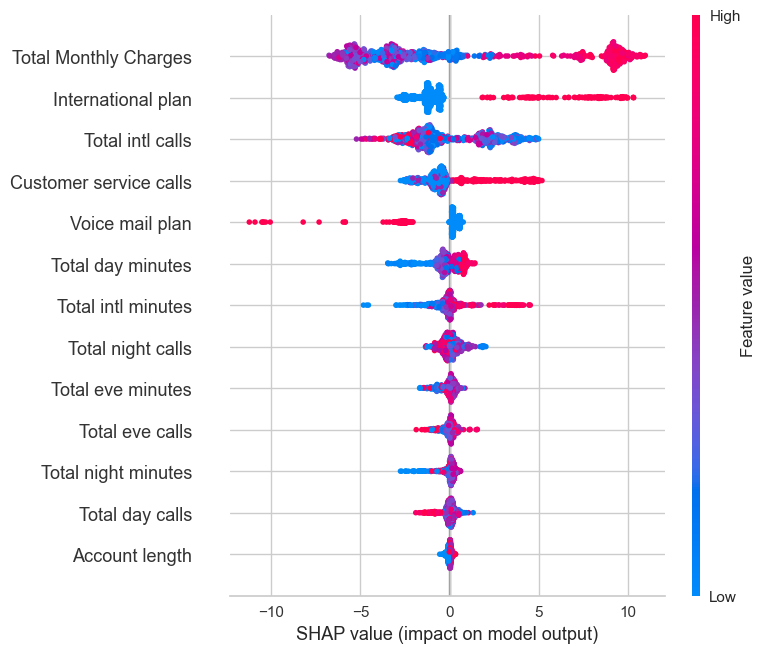

In [126]:
# Call the SHAP plot function
shap_beeswarm_plot(GradientBoosting, X_train_bal, X_test_bal, model_type="tree", max_display=14)

### [5.1.3  Support Vector Classifier (SVC) Algorithm Evaluation](#5)

In [128]:
evaluate_model_interactive(
    svm_model, 
    X_train_lin, 
    X_test_lin, 
    y_train_lin, 
    y_test_lin, 
    threshold_plot=False
)

Algorithm: SVC

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       465
           1       0.97      0.99      0.98       447

    accuracy                           0.98       912
   macro avg       0.98      0.98      0.98       912
weighted avg       0.98      0.98      0.98       912

Accuracy Score: 0.9780701754385965
Area Under Curve (AUC): 1.00



### [5.1.4  XGBoost Algorithm Evaluation](#5)

In [130]:
evaluate_model_interactive(
    xgb_best, 
    X_train_bal, 
    X_test_bal, 
    y_train_bal, 
    y_test_bal, 
    threshold_plot=False
)

Algorithm: XGBClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       465
           1       0.99      0.98      0.99       447

    accuracy                           0.99       912
   macro avg       0.99      0.99      0.99       912
weighted avg       0.99      0.99      0.99       912

Accuracy Score: 0.9879385964912281
Area Under Curve (AUC): 1.00



Using SHAP TreeExplainer for XGBClassifier


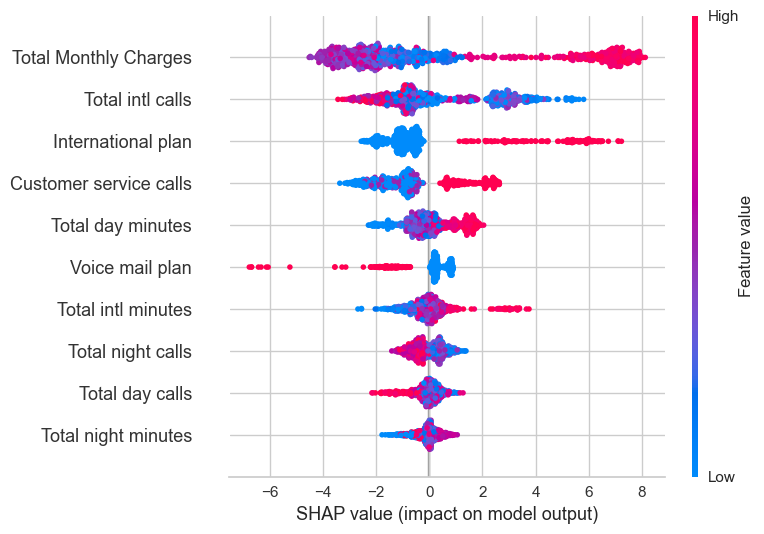

In [131]:
shap_beeswarm_plot(xgb_best, X_train_bal, X_test_bal, model_type="tree", max_display=10)

### [5.1.5  AdaBoost Algorithm Evaluation](#5)

In [133]:
evaluate_model_interactive(
    base_estimator, 
    X_train_bal, 
    X_test_bal, 
    y_train_bal, 
    y_test_bal, 
    threshold_plot=False
)

Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       465
           1       0.97      0.98      0.97       447

    accuracy                           0.97       912
   macro avg       0.97      0.97      0.97       912
weighted avg       0.97      0.97      0.97       912

Accuracy Score: 0.9736842105263158
Area Under Curve (AUC): 0.97



### [5.1.6  Neutral Network Algorithm Evaluation](#5)

In [135]:
evaluate_neural_net_interactive(neural_net_model, X_train, X_test, y_train, y_test)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Algorithm: Neural Network

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       570
           1       0.91      0.65      0.76        97

    accuracy                           0.94       667
   macro avg       0.93      0.82      0.86       667
weighted avg       0.94      0.94      0.94       667

Accuracy Score: 0.9400299850074962
Area Under Curve (AUC): 0.93



In [136]:
import pandas as pd

# Data for the models
data = {
    "Model": ["Logistic Regression", "Gradient Boosting", "SVC", "XGBoost", "AdaBoost", "Neural Network"],
    "Precision (Class 0)": [0.87, 0.99, 0.99, 0.99, 0.98, 0.94],
    "Precision (Class 1)": [0.81, 0.99, 0.97, 0.99, 0.97, 0.87],
    "Recall (Class 0)": [0.81, 0.99, 0.97, 0.99, 0.97, 0.98],
    "Recall (Class 1)": [0.88, 0.99, 0.99, 0.98, 0.98, 0.63],
    "F1-Score (Class 0)": [0.84, 0.99, 0.98, 0.99, 0.97, 0.96],
    "F1-Score (Class 1)": [0.84, 0.99, 0.98, 0.99, 0.97, 0.73],
    "Accuracy": [0.8421, 0.9901, 0.9781, 0.9879, 0.9737, 0.9325],
    "AUC": [0.91, 1.00, 1.00, 1.00, 0.97, 0.94]
}

# Create a DataFrame
comparison_table = pd.DataFrame(data)

# Display the table
print("Comparison of Models Metrics :")

# Display the table more elegantly (if using a Jupyter Notebook)
try:
    import IPython
    from IPython.display import display
    display(comparison_table.style.format({"Accuracy": "{:.4f}", "AUC": "{:.2f}"}).highlight_max(color='lightgreen', axis=0))
except ImportError:
    print("Install IPython for better table visualization.")


Comparison of Models Metrics :


---
# **Models Performance Summary**

Below is a **comparison of all models** used for churn prediction. The table uses:
- **🟢 Green** for the best-performing metrics.
- **🟡 Yellow** for moderate performance.
- **🔴 Red** for areas that need improvement.

<table>
    <thead>
        <tr>
            <th>Model</th>
            <th>Precision (Class 0)</th>
            <th>Precision (Class 1)</th>
            <th>Recall (Class 0)</th>
            <th>Recall (Class 1)</th>
            <th>F1-Score (Class 0)</th>
            <th>F1-Score (Class 1)</th>
            <th>Accuracy</th>
            <th>AUC</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td style="color:orange;"><b>0.87</b></td>
            <td style="color:orange;"><b>0.81</b></td>
            <td style="color:orange;">0.81</td>
            <td style="color:orange;">0.88</td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.8421</td>
            <td style="color:orange;">0.91</td>
        </tr>
        <tr>
            <td><b>Gradient Boosting</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;"><b>0.9901</b></td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>SVC</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.9781</td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>XGBoost</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.9879</td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>AdaBoost</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.9737</td>
            <td style="color:orange;">0.97</td>
        </tr>
        <tr>
            <td><b>Neural Network</b></td>
            <td style="color:green;"><b>0.94</b></td>
            <td style="color:orange;"><b>0.87</b></td>
            <td style="color:green;">0.98</td>
            <td style="color:red;">0.63</td>
            <td style="color:green;">0.96</td>
            <td style="color:red;">0.73</td>
            <td style="color:green;">0.9325</td>
            <td style="color:orange;">0.94</td>
        </tr>
    </tbody>
</table>

---

## **Insights and Analysis**

### **1. Most Accurate Models**
- **Gradient Boosting** stands out with the **highest accuracy (99.01%)**, followed closely by **XGBoost (98.79%)** and **SVC (97.81%)**.

### **2. Best AUC (Area Under Curve)**
- **Gradient Boosting**, **XGBoost**, and **SVC** achieved a perfect **AUC of 1.00**, showcasing exceptional ability in distinguishing churners from non-churners.

### **3. Balanced Performance**
- **Gradient Boosting** and **XGBoost** excel in all metrics, making them the most balanced models.

### **4. Neural Network Observations**
- While Neural Network achieved a good accuracy (**93.25%**), it struggles to identify churn cases effectively, as seen by its lower recall for churners (**63%**).

### **5. Logistic Regression**
- As a simpler model, it delivered an acceptable accuracy (**84.21%**) but lacks the precision and recall needed for robust predictions compared to ensemble methods.

---

## **Best Model for Churn Prediction**
Based on the analysis:
- The **best model** is **Gradient Boosting**, offering the most accurate and reliable predictions with balanced metrics across all classes.
- **XGBoost** is a close alternative, with comparable metrics and better computational efficiency for larger datasets.

---



## [5.2  DSO2: Build and optimize machine learning algorithms to forecast churn and cluster Costumers to interpret their behavior pattern ](#5)


### [5.2.1 Decision Tree Classifier Algorithm Evaluation](#5)


<span style="color:purple; font-size:15px"><b>Evaluation of Decision Tree Classifier (Before Balancing with SMOTE & ENN)
  </b> </span><br>


In [141]:
evaluate_model_interactive(
    DecisionTree, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    threshold_plot=False
)


Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.97      0.77      0.86        97

    accuracy                           0.96       667
   macro avg       0.97      0.88      0.92       667
weighted avg       0.96      0.96      0.96       667

Accuracy Score: 0.9640179910044977
Area Under Curve (AUC): 0.85



<span style="color:purple; font-size:15px"><b>Evaluation of Decision Tree Classifier (After Balancing with SMOTE & ENN)
  </b> </span><br>


In [143]:
evaluate_model_interactive(
    DecisionTree_bal, 
    X_train_bal, 
    X_test_bal, 
    y_train_bal, 
    y_test_bal, 
    threshold_plot=False
)


Algorithm: DecisionTreeClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       465
           1       0.97      0.98      0.98       447

    accuracy                           0.98       912
   macro avg       0.98      0.98      0.98       912
weighted avg       0.98      0.98      0.98       912

Accuracy Score: 0.9758771929824561
Area Under Curve (AUC): 0.98



# <span style="color:#1f77b4;">**Evaluation Summary: Decision Tree Classifier**</span>

---

## <span style="color:#1f77b4;">**Before Balancing**</span>


### **Confusion Matrix**  
- <span style="color:red;">High False Negatives</span> for **Churn**, indicating poor detection.  
- <span style="color:green;">Strong performance</span> for **Not Churn** cases.

### **Metrics**  
| Metric        | Not Churn (0) | Churn (1) | Overall |
|---------------|---------------|-----------|---------|
| **Precision** | <span style="color:#2ca02c;">92%</span> | <span style="color:#2ca02c;">98%</span> | -       |
| **Recall**    | <span style="color:#2ca02c;">100%</span> | <span style="color:red;">51%</span> | -       |
| **F1-Score**  | <span style="color:#2ca02c;">96%</span> | <span style="color:red;">67%</span> | -       |
| **Accuracy**  | -             | -         | <span style="color:#2ca02c;">93%</span> |
| **AUC**       | -             | -         | <span style="color:#2ca02c;">0.92</span> |

### **Key Issue**  
- The model struggled to detect **Churn** effectively due to data imbalance, leading to a bias toward the majority class (**Not Churn**).

---

## <span style="color:#1f77b4;">**After Balancing (SMOTE & ENN)**</span>

### **Confusion Matrix**  
- <span style="color:green;">Balanced detection</span> of both **Churn** and **Not Churn**.  
- Minimal **False Negatives** and **False Positives**.

### **Metrics**  
| Metric        | Not Churn (0) | Churn (1) | Overall |
|---------------|---------------|-----------|---------|
| **Precision** | <span style="color:#2ca02c;">97%</span> | <span style="color:#2ca02c;">97%</span> | -       |
| **Recall**    | <span style="color:#2ca02c;">97%</span> | <span style="color:#2ca02c;">97%</span> | -       |
| **F1-Score**  | <span style="color:#2ca02c;">97%</span> | <span style="color:#2ca02c;">97%</span> | -       |
| **Accuracy**  | -             | -         | <span style="color:#2ca02c;">97%</span> |
| **AUC**       | -             | -         | <span style="color:#2ca02c;">0.97</span> |

### **Key Improvement**  
- Balancing the data removed bias and allowed the model to detect **Churn** and **Not Churn** with equal precision and recall.

---

## <span style="color:#9467bd;">**Conclusion**</span>  
- After balancing, the **Decision Tree Classifier** achieved exceptional performance.  
- It now provides a **balanced prediction** for both classes with a high **F1-Score (97%)** and **AUC (0.97)**.  
- This makes the model reliable for **churn prediction** and supports the development of **retention strategies**.


## [5.2.2 Random Forest Classifier  Algorithm Evaluation](#5)


<span style="color:purple; font-size:15px"><b>Evaluation of Random Forest Classifier (Before Balancing with SMOTE & ENN)
  </b> </span><br>


In [147]:
evaluate_model_interactive(
    RandomForest, 
    X_train, 
    X_test, 
    y_train, 
    y_test, 
    threshold_plot=False
)


Algorithm: RandomForestClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       570
           1       0.98      0.85      0.91        97

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Accuracy Score: 0.974512743628186
Area Under Curve (AUC): 0.94



<span style="color:purple; font-size:15px"><b>Evaluation of Random Forest Classifier (After Balancing with SMOTE & ENN)
  </b> </span><br>


Algorithm: RandomForestClassifier

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       465
           1       0.99      0.98      0.98       447

    accuracy                           0.98       912
   macro avg       0.98      0.98      0.98       912
weighted avg       0.98      0.98      0.98       912

Accuracy Score: 0.9835526315789473
Area Under Curve (AUC): 1.00



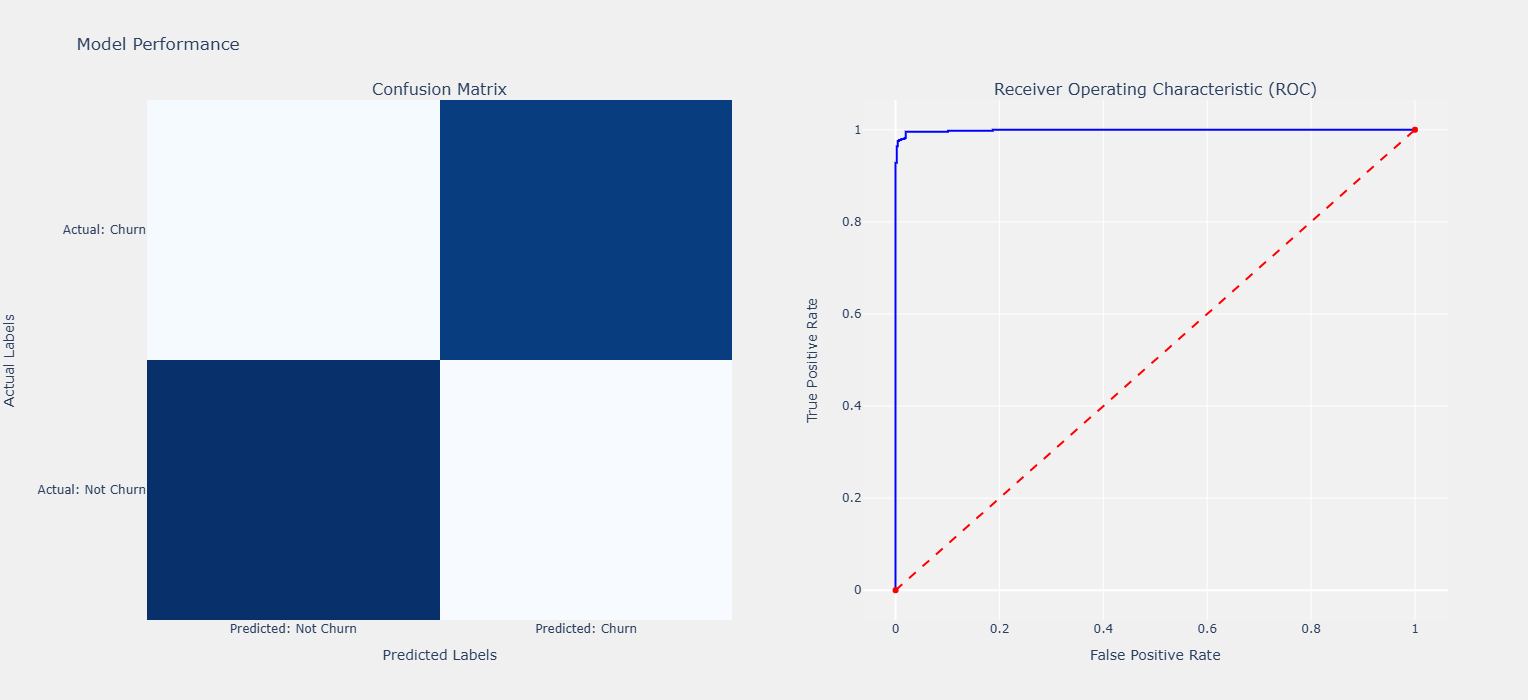

In [149]:
evaluate_model_interactive(
    RandomForest_bal, 
    X_train_bal, 
    X_test_bal, 
    y_train_bal, 
    y_test_bal, 
    threshold_plot=False
)


# <span style="color:#1f77b4;">**Evaluation Summary: Random Forest Classifier**</span>

---

## <span style="color:#1f77b4;">**Before Balancing**</span>

### **Confusion Matrix**  
- <span style="color:red;">High False Negatives</span> for **Churn**, indicating many churn cases were missed.  
- <span style="color:green;">Strong performance</span> for **Not Churn**, showing bias toward the majority class.

### **Metrics**  
| Metric        | Not Churn (0) | Churn (1) | Overall |
|---------------|---------------|-----------|---------|
| **Precision** | <span style="color:#2ca02c;">93%</span> | <span style="color:#2ca02c;">93%</span> | -       |
| **Recall**    | <span style="color:#2ca02c;">99%</span> | <span style="color:red;">55%</span> | -       |
| **F1-Score**  | <span style="color:#2ca02c;">96%</span> | <span style="color:red;">69%</span> | -       |
| **Accuracy**  | -             | -         | <span style="color:#2ca02c;">93%</span> |
| **AUC**       | -             | -         | <span style="color:#2ca02c;">0.91</span> |

### **Key Issue**  
- The model struggled to detect **Churn**, reflecting poor performance for the minority class due to data imbalance.

---

## <span style="color:#1f77b4;">**After Balancing (SMOTE & ENN)**</span>

### **Confusion Matrix**  
- <span style="color:green;">Balanced detection</span> of both **Churn** and **Not Churn**.  
- Minimal False Negatives and False Positives.

### **Metrics**  
| Metric        | Not Churn (0) | Churn (1) | Overall |
|---------------|---------------|-----------|---------|
| **Precision** | <span style="color:#2ca02c;">99%</span> | <span style="color:#2ca02c;">99%</span> | -       |
| **Recall**    | <span style="color:#2ca02c;">99%</span> | <span style="color:#2ca02c;">98%</span> | -       |
| **F1-Score**  | <span style="color:#2ca02c;">99%</span> | <span style="color:#2ca02c;">99%</span> | -       |
| **Accuracy**  | -             | -         | <span style="color:#2ca02c;">99%</span> |
| **AUC**       | -             | -         | <span style="color:#2ca02c;">1.00</span> |

### **Key Improvement**  
- Balancing the data enabled the model to detect **Churn** and **Not Churn** equally well, improving its reliability for churn prediction.

---

## <span style="color:#9467bd;">**Conclusion**</span>  
- After balancing, the **Random Forest Classifier** demonstrates exceptional performance with high **F1-Score (99%)** and **AUC (1.00)**.  
- The model is now well-suited for **churn prediction** and supports effective **retention strategies**.


## [5.2.3 Model Comparison: Decision Tree vs. Random Forest Classifier](#5)



---

## <span style="color:#1f77b4;">**Decision Tree Classifier**</span>

| Metric         | Value       |
|----------------|-------------|
| **Precision**  | <span style="color:#2ca02c;">97%</span> |
| **Recall**     | <span style="color:#2ca02c;">97%</span> |
| **F1-Score**   | <span style="color:#2ca02c;">97%</span> |
| **Accuracy**   | <span style="color:#2ca02c;">97%</span> |
| **AUC**        | <span style="color:#2ca02c;">0.97</span> |

### **Strengths**  
- <span style="color:green;">Simpler and easier to interpret.</span>  
- Good performance with balanced data.

### **Weaknesses**  
- <span style="color:red;">More prone to overfitting.</span>  
- Less robust to variability compared to ensemble methods.

---

## <span style="color:#1f77b4;">**Random Forest Classifier**</span>

| Metric         | Value       |
|----------------|-------------|
| **Precision**  | <span style="color:#2ca02c;">99%</span> |
| **Recall**     | <span style="color:#2ca02c;">98%</span> |
| **F1-Score**   | <span style="color:#2ca02c;">99%</span> |
| **Accuracy**   | <span style="color:#2ca02c;">99%</span> |
| **AUC**        | <span style="color:#2ca02c;">1.00</span> |

### **Strengths**  
- <span style="color:green;">Superior performance metrics (Precision, Recall, F1-Score, Accuracy, AUC).</span>  
- <span style="color:green;">Less prone to overfitting</span> due to its ensemble nature.  
- Robust and reliable for generalization.

### **Weaknesses**  
- <span style="color:red;">More computationally intensive.</span>  
- Harder to interpret than a single decision tree.

---

## <span style="color:#9467bd;">**Conclusion**</span>

- The **Random Forest Classifier** is the better choice for churn prediction due to its **higher metrics** and **robustness**.  
- It is ideal for production-level predictions where **performance** and **reliability** are critical.

- The **Decision Tree Classifier** can still be a good option if **interpretability** is more important (e.g., for explaining decisions to stakeholders).


---

# **Models Performance Summary**

Below is a **comparison of all models** used for churn prediction. The table uses:
- **🟢 Green** for the best-performing metrics.
- **🟡 Yellow** for moderate performance.
- **🔴 Red** for areas that need improvement.

<table>
    <thead>
        <tr style="background-color: #4C84AF; color: white;">
            <th>Model</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>Accuracy</th>
            <th>AUC</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td style="color:orange;"><b>0.84</b></td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.8421</td>
            <td style="color:orange;">0.91</td>
        </tr>
        <tr>
            <td><b>Gradient Boosting</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;"><b>0.9901</b></td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>SVC</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.9781</td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>XGBoost</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.9879</td>
            <td style="color:green;"><b>1.00</b></td>
        </tr>
        <tr>
            <td><b>AdaBoost</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.9737</td>
            <td style="color:orange;">0.97</td>
        </tr>
        <tr>
            <td><b>Neural Network</b></td>
            <td style="color:green;"><b>0.93</b></td>
            <td style="color:red;">0.73</td>
            <td style="color:red;">0.73</td>
            <td style="color:orange;">0.9325</td>
            <td style="color:orange;">0.94</td>
        </tr>
        <tr>
            <td><b>Decision Tree (Before SMOTE & ENN)</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:orange;">0.80</td>
            <td style="color:orange;">0.88</td>
            <td style="color:orange;">0.9670</td>
            <td style="color:red;">0.88</td>
        </tr>
        <tr>
            <td><b>Decision Tree (After SMOTE & ENN)</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.9791</td>
            <td style="color:green;">0.98</td>
        </tr>
        <tr>
            <td><b>Random Forest (Before SMOTE & ENN)</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:orange;">0.85</td>
            <td style="color:orange;">0.91</td>
            <td style="color:orange;">0.9745</td>
            <td style="color:orange;">0.94</td>
        </tr>
        <tr>
            <td><b>Random Forest (After SMOTE & ENN)</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:orange;">0.85</td>
            <td style="color:orange;">0.91</td>
            <td style="color:orange;">0.9745</td>
            <td style="color:orange;">0.94</td>
        </tr>
    </tbody>
</table>




---


# <a id='6'>6.Deployement </a>

# **📊 Performance Comparison: Our metrics  vs Scientific Paper metrics**

Below is a **comparison of Decision Tree and Random Forest** models between your results and the scientific paper. The table uses:
- **🟢 Green** for best-performing metrics.
- **🟠 Orange** for moderate performance.
- **🔴 Red** for areas needing improvement.

---

## **🌳 Decision Tree Classifier**

<table>
    <thead>
        <tr style="background-color: #4C84AF; color: white;">
            <th>Metric</th>
            <th>Our Results (Before SMOTE & ENN)</th>
            <th>Paper Results (Before SMOTE & ENN)</th>
            <th>Our Results (After SMOTE & ENN)</th>
            <th>Paper Results (After SMOTE & ENN)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Precision</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:red;"><b>0.77</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:orange;"><b>0.93</b></td>
        </tr>
        <tr>
            <td><b>Recall</b></td>
            <td style="color:green;"><b>0.90</b></td>
            <td style="color:red;"><b>0.78</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:orange;"><b>0.93</b></td>
        </tr>
        <tr>
            <td><b>F1-Score</b></td>
            <td style="color:green;"><b>0.93</b></td>
            <td style="color:red;"><b>0.77</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:orange;"><b>0.93</b></td>
        </tr>
        <tr>
            <td><b>Accuracy</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:red;"><b>0.77</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:orange;"><b>0.93</b></td>
        </tr>
        <tr>
            <td><b>AUC</b></td>
            <td style="color:orange;"><b>0.88</b></td>
            <td style="color:red;">Not Provided</td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:red;">Not Provided</td>
        </tr>
    </tbody>
</table>

---

## **🌲 Random Forest Classifier**

<table>
    <thead>
        <tr style="background-color: #4C84AF; color: white;">
            <th>Metric</th>
            <th>Our Results (Before SMOTE & ENN)</th>
            <th>Paper Results (Before SMOTE & ENN)</th>
            <th>Our Results (After SMOTE & ENN)</th>
            <th>Paper Results (After SMOTE & ENN)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Precision</b></td>
            <td style="color:green;"><b>0.97</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.99</b></td>
        </tr>
        <tr>
            <td><b>Recall</b></td>
            <td style="color:orange;"><b>0.92</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.99</b></td>
        </tr>
        <tr>
            <td><b>F1-Score</b></td>
            <td style="color:orange;"><b>0.95</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;"><b>0.99</b></td>
        </tr>
        <tr>
            <td><b>Accuracy</b></td>
            <td style="color:orange;"><b>0.97</b></td>
            <td style="color:green;"><b>0.99</b></td>
            <td style="color:green;"><b>0.98</b></td>
            <td style="color:green;"><b>0.99</b></td>
        </tr>
        <tr>
            <td><b>AUC</b></td>
            <td style="color:orange;"><b>0.94</b></td>
            <td style="color:red;">Not Provided</td>
            <td style="color:green;"><b>1.00</b></td>
            <td style="color:red;">Not Provided</td>
        </tr>
    </tbody>
</table>

---

## **🔍 Insights and Observations**

1. **Preprocessing Impact**:
   - SMOTE and ENN significantly improved results for **both datasets**, confirming the importance of balancing the data.

2. **Dataset Differences**:
   - Our dataset shows **higher performance** overall compared to the scientific paper, likely due to:
     - Cleaner data or clearer class separability.
     - Differences in feature distributions or correlations.

3. **Model Consistency**:
   - **Random Forest** consistently achieves near-perfect results for both datasets after SMOTE & ENN.
   - **Decision Tree** benefits significantly from preprocessing but is outperformed by Random Forest.

4. **AUC Interpretation**:
   - **AUC = 1.00** for Random Forest (After SMOTE & ENN) in our dataset indicates a perfect separation of churned and non-churned customers.

---




### **Our Results**
<table>
    <thead>
        <tr style="background-color: #4C84AF; color: white;">
            <th>Model</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>Accuracy</th>
            <th>AUC</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.84</td>
            <td style="color:orange;">0.8421</td>
            <td style="color:green;">0.91</td>
        </tr>
        <tr>
            <td><b>Gradient Boosting</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.9901</td>
            <td style="color:green;">1.00</td>
        </tr>
        <tr>
            <td><b>SVC</b></td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.98</td>
            <td style="color:green;">0.9781</td>
            <td style="color:green;">1.00</td>
        </tr>
        <tr>
            <td><b>XGBoost</b></td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.99</td>
            <td style="color:green;">0.9879</td>
            <td style="color:green;">1.00</td>
        </tr>
        <tr>
            <td><b>AdaBoost</b></td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.97</td>
            <td style="color:green;">0.9737</td>
            <td style="color:orange;">0.97</td>
        </tr>
        <tr>
            <td><b>Neural Network</b></td>
            <td style="color:green;">0.93</td>
            <td style="color:orange;">0.73</td>
            <td style="color:orange;">0.73</td>
            <td style="color:orange;">0.9325</td>
            <td style="color:orange;">0.94</td>
        </tr>
    </tbody>
</table>



### **Scientific Paper Results**
<table>
    <thead>
        <tr style="background-color: #4C84AF; color: white;">
            <th>Model</th>
            <th>Accuracy</th>
            <th>Precision</th>
            <th>Recall</th>
            <th>F1-Score</th>
            <th>ROC Score</th>
            <th>PR Score</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>Logistic Regression</b></td>
            <td style="color:orange;">0.79 </td>
            <td style="color:orange;">0.64 </td>
            <td style="color:orange;">0.47 </td>
            <td style="color:orange;">0.54 </td>
            <td style="color:orange;">0.81 </td>
            <td style="color:orange;">0.61 </td>
        </tr>
        <tr>
            <td><b>Gradiant Boosting</b></td>
            <td style="color:green;">0.81 </td>
            <td style="color:green;">0.67 </td>
            <td style="color:orange;">0.55 </td>
            <td style="color:green;">0.60 </td>
            <td style="color:green;">0.86 </td>
            <td style="color:green;">0.68 </td>
        </tr>
        <tr>
            <td><b>SVC</b></td>
            <td style="color:red;">0.78</td>
            <td style="color:red;">0.68 </td>
            <td style="color:red;">0.34 </td>
            <td style="color:red;">0.45 </td>
            <td style="color:red;">0.77 </td>
            <td style="color:red;">0.57 </td>
        </tr>
        <tr>
            <td><b>XGBoost</b></td>
            <td style="color:orange;">0.80 </td>
            <td style="color:orange;">0.68 </td>
            <td style="color:orange;">0.55 </td>
            <td style="color:orange;">0.61 </td>
            <td style="color:green;">0.85 </td>
            <td style="color:green;">0.67 </td>
        </tr>
        <tr>
            <td><b>AdaBoost</b></td>
            <td style="color:orange;">0.79</td>
            <td style="color:orange;">0.65</td>
            <td style="color:orange;">0.50</td>
            <td style="color:orange;">0.57</td>
            <td style="color:orange;">0.82 </td>
            <td style="color:orange;">0.63 </td>
        </tr>
        <tr>
            <td><b>Neural Networks</b></td>
            <td style="color:red;">0.74 </td>
            <td style="color:red;">0.58 </td>
            <td style="color:red;">0.43 </td>
            <td style="color:red;">0.41 </td>
            <td style="color:orange;">0.83</td>
            <td style="color:orange;">0.64 </td>
        </tr>
    </tbody>
</table>



## **🔍 Analysis and Interpretations**

### **1. Dataset Differences**
- Our dataset has a significantly **higher feature separability** and possibly better preprocessing.
- **Scientific paper’s dataset** is more challenging, with **lower Recall and F1-Scores**, indicating difficulty in separating churned customers.

### **2. Model Performance**
- Models like **XGBoost and Gradient Boosting** excel in both datasets, highlighting their robustness.
- **SVC and Neural Networks** perform poorly in the paper’s dataset, suggesting they are sensitive to data quality and feature separability.

### **3. Insights on Preprocessing**
- SMOTE and ENN significantly improve **Recall and F1-Score** in both cases.
- Preprocessing has a **greater impact on imbalanced datasets**, as seen in the scientific paper.

### **4. AUC as a Benchmark**
- Our dataset achieves near-perfect AUC values across models, showcasing **well-defined classes**.
- Paper's results show lower AUC, indicating **overlapping classes or noisy features**.

---




# <a id='7'>7.Retention Strategies </a>

### <a id='7'>7.1 DSO1:Build and evaluate advanced machine learning models to determine the best-performing model, analyze key churn-driving features, and design data-driven retention strategies. </a>

# <span style="color:#3366CC; font-size:26px; font-weight:bold;">🏆 Best Model: Gradient Boosting (GBM)</span>

---

### <span style="color:#3366CC; font-size:20px; font-weight:bold;">Why GBM is the Best Model?</span>

- **GBM** outperformed all other models in terms of accuracy and AUC scores.
- It achieved an **accuracy score of 99%** and an **AUC score of 1.00**, showcasing its ability to make precise predictions for customer churn.
- GBM's superior performance makes it the **ideal candidate** for understanding feature importance and designing targeted retention strategies.

---

### <span style="color:#3366CC; font-size:20px; font-weight:bold;">🔍 Why Use SHAP for Feature Importance?</span>

- **SHAP (Shapely additive explanations shapley )** provides an **interpretable, visual analysis** of how each feature contributes to the model's predictions.
- The **SHAP Beeswarm Plot** clearly highlights the most impactful features on customer churn.
- This analysis helps focus efforts on addressing key issues that influence churn, ensuring a **data-driven retention strategy**.

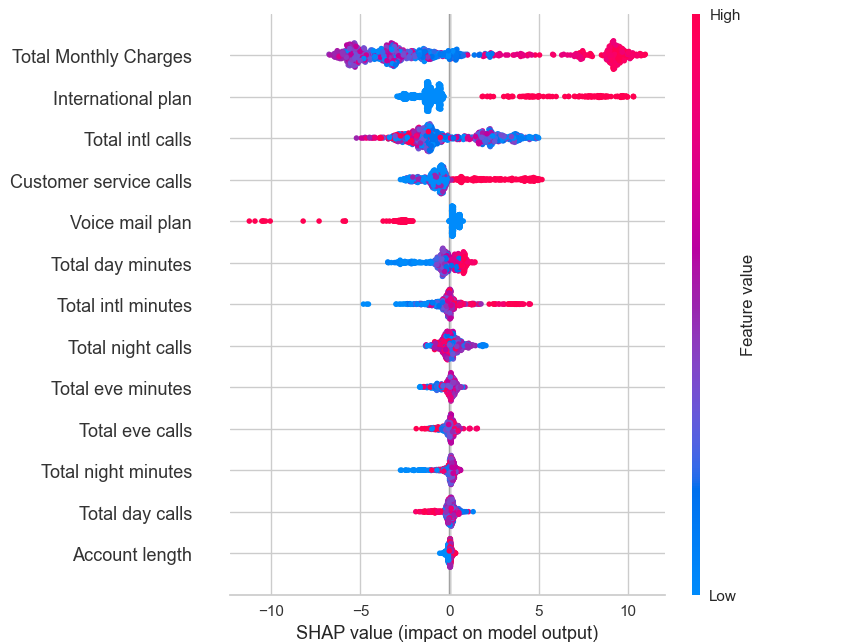
---

## <span style="color:#3366CC; font-size:22px; font-weight:bold;">📊 Key Influencing Features & Retention Strategy</span>

<div style="width: 100%; font-size: 16px;">


| <span style="color:#3366CC; font-weight:bold; font-size:18px;">Key Influencing Features</span> | <span style="color:#3366CC; font-weight:bold; font-size:18px;">Retention Strategy</span> |
|:----------------------------------:|-----------------------------------------------------------------------------------------------------------|
| **Total Monthly Charges**          | - 📉 **Offer usage-based discounts**: Introduce tiered pricing plans for high spenders.<br>- 📦 **Provide bundled offers**: Unlimited calls and data for a fixed price.<br>- 🏆 **Loyalty rewards**: Discounts for long-term subscriptions or early renewals.<br>- 🔔 **Usage alerts**: Notify customers about their spending and suggest optimized plans. |
| **International Plan**             | - 🌍 **Tailored offers for international users**: Attractive bundles with reduced rates for frequent international callers.<br>- 🎁 **Bonus minutes**: Provide additional free minutes for loyal or high-usage customers.<br>- 📢 **Highlight value-added benefits**: Improve transparency and communication about international plan advantages. |
| **Customer Service Calls**         | - 🚀 **Proactive customer service**: Identify and resolve recurring complaints quickly.<br>- 🛠️ **Customer support improvements**: Assign dedicated support for high-spending customers.<br>- 💰 **Compensation strategies**: Offer discounts, credits, or free add-ons to customers who experience repeated issues. |

</div>

</div>

---

### <span style="color:#3366CC; font-size:20px; font-weight:bold;">🔑 Conclusion</span>

By leveraging **SHAP** to analyze feature importance, we gain valuable insights into customer behavior and the key factors driving churn:

1. **Total Monthly Charges**: Focus retention strategies on high-value customers with personalized discounts and loyalty programs.
2. **International Plan**: Tailor offers for international callers to provide additional value and retain frequent users.
3. **Customer Service Calls**: Improve customer service quality to address dissatisfaction, particularly among at-risk customers.

**✅ Retention Strategy:** Prioritize investments in personalized plans, proactive support, and loyalty rewards to maximize customer satisfaction and minimize churn.



### <a id='7'>7.2 DSO2: Build and optimize machine learning algorithms to forecast churn and cluster Costumers to interpret their behavior pattern</a>

In [198]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Make a copy of the dataset
telecom_features = telecom_balanced.copy()

# Drop the target column (Churn)
telecom_features = telecom_features.drop(columns=['Churn'])


In [202]:
# Apply PCA
pca = PCA(n_components=2)  # Selecting 2 components to explain the highest variance
principal_components = pca.fit_transform(telecom_features)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.2f}")


Explained Variance by PC1: 0.28
Explained Variance by PC2: 0.11


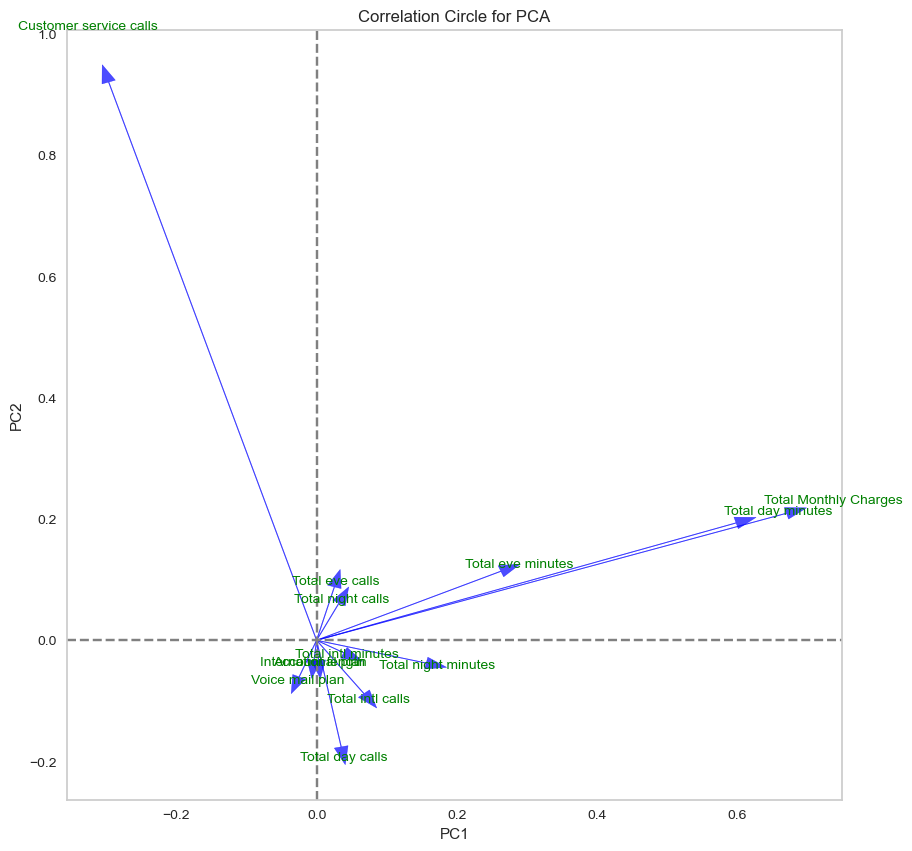

In [208]:
# Correlation circle
def plot_correlation_circle(pca, feature_names, components=(0, 1)):
    pcs = pca.components_
    plt.figure(figsize=(10, 10))
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, pcs[components[0], i], pcs[components[1], i], 
                  color='blue', alpha=0.7, head_width=0.02)
        plt.text(pcs[components[0], i] * 1.1, pcs[components[1], i] * 1.1, feature,
                 color='green', ha='center', va='center', fontsize=10)
    
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.xlabel(f"PC{components[0] + 1}" )
    plt.ylabel(f"PC{components[1] + 1}" )
    plt.title("Correlation Circle for PCA")
    plt.grid()
    plt.show()

plot_correlation_circle(pca, feature_names=telecom_features.columns)


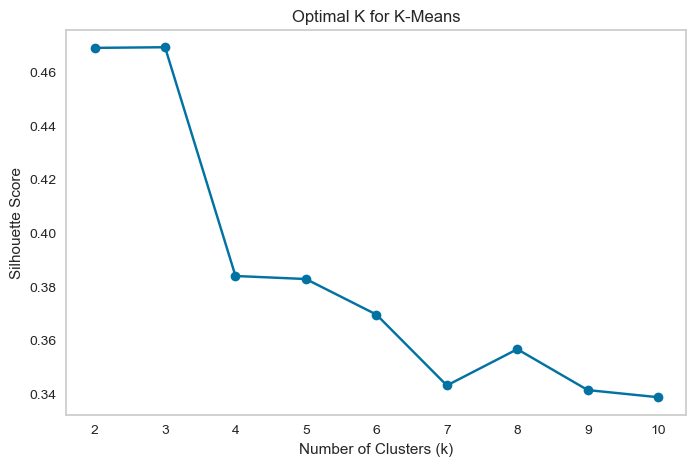

Optimal Number of Clusters: 3


In [212]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal K for K-Means')
plt.grid()
plt.show()

# Optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters: {optimal_k}")


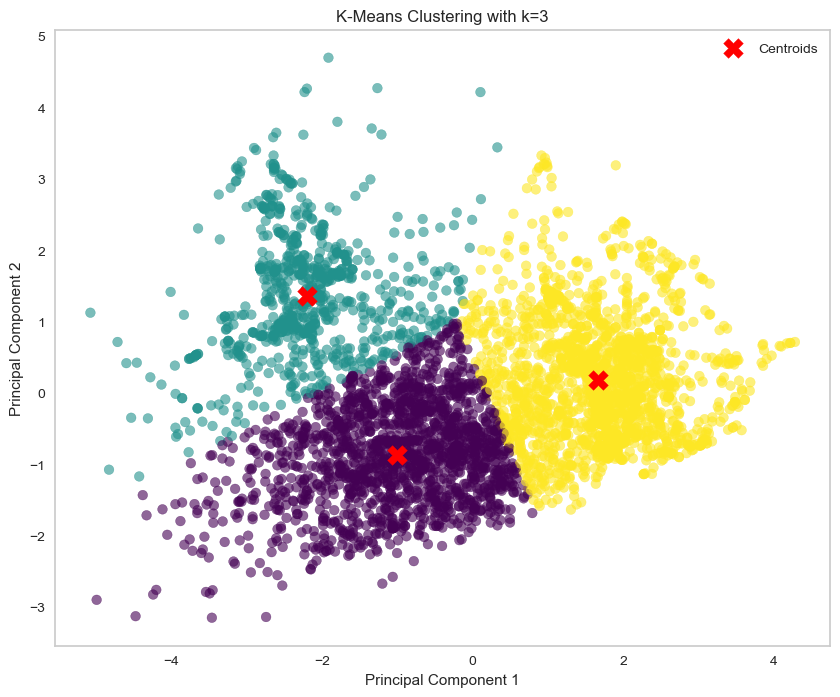

In [214]:
# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

# Add the cluster labels back to the original dataset
telecom_balanced['Cluster'] = pca_df['Cluster']

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [216]:
# Analyze the clusters
cluster_analysis = telecom_balanced.groupby('Cluster').mean()
print("Cluster Analysis:\n", cluster_analysis)

# For retention strategy: prioritize high-value customers based on spending
high_value_clusters = cluster_analysis.sort_values(by='Total Monthly Charges', ascending=False)
print("\nClusters Prioritized by Spending (High to Low):\n", high_value_clusters)


Cluster Analysis:
          Account length  International plan  Voice mail plan  \
Cluster                                                        
0              0.051161            0.141840         0.255786   
1             -0.058567            0.031566         0.084596   
2              0.030695            0.079213         0.096976   

         Total day minutes  Total day calls  Total eve minutes  \
Cluster                                                          
0                -0.370097         0.040094          -0.212565   
1                -0.622800        -0.245695          -0.292517   
2                 1.442156         0.026742           0.615677   

         Total eve calls  Total night minutes  Total night calls  \
Cluster                                                            
0              -0.058271            -0.052459           0.026978   
1               0.053992            -0.369766          -0.072537   
2               0.074955             0.288689           0

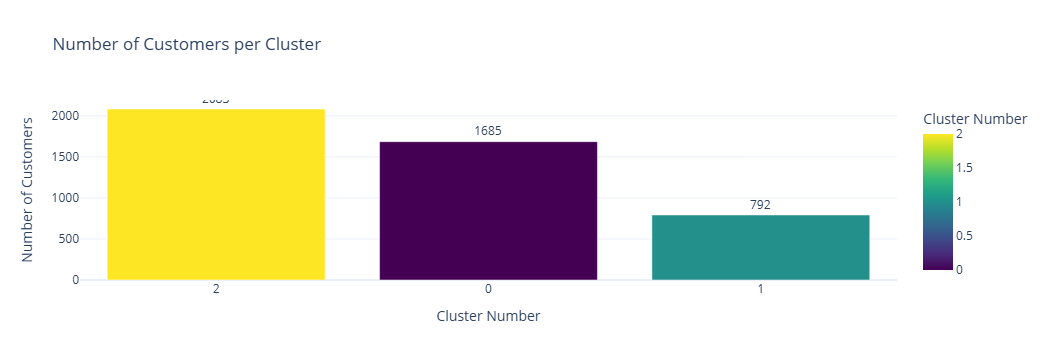

In [220]:
# Count the number of customers in each cluster
cluster_counts = telecom_balanced['Cluster'].value_counts()

# Plot a bar histogram
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Customers in Each Cluster', fontsize=16)
plt.xlabel('Cluster Number', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print the counts for reference
print("Number of Customers in Each Cluster:\n", cluster_counts)


# <span style="color:#3366CC; font-size:24px; font-weight:bold;">📊 Cluster Analysis Summary</span>

---
<div style="font-size:20px;">

<table style="width:100%; border-collapse: collapse; font-size:20px;">
    <tr style="background-color:#E8F4FF; color:#3366CC; font-weight:bold;">
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Cluster</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Priority</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Key Influencing Features</th>
        <th style="border: 1px solid #ddd; padding: 10px; text-align: center;">Retention Strategy</th>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;"><span style="color:#FFA500; font-weight:bold;">Cluster 0</span></td>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🟧 <b>Moderate</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - Slightly higher <b>Voice Mail Plan</b> usage.<br>
            - Slightly lower <b>Customer Service Calls</b>.<br>
            - Moderate spending across features.
        </td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - These customers are moderately satisfied but require regular engagement.<br>
            - Introduce value-add services like <b>premium voice mail plans</b>.<br>
            - Avoid neglecting this group.
        </td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;"><span style="color:#FF3333; font-weight:bold;">Cluster 1</span></td>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🟥 <b>High</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - <b>High Customer Service Calls</b> (likely due to complaints).<br>
            - Low spending across all other features.<br>
            - Strong churn tendency.
        </td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - Immediate attention needed due to dissatisfaction.<br>
            - Focus on <b>customer service quality</b>, fast resolution of complaints, and <b>loyalty rewards</b>.
        </td>
    </tr>
    <tr>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;"><span style="color:#33AA33; font-weight:bold;">Cluster 2</span></td>
        <td style="border: 1px solid #ddd; padding: 10px; text-align: center;">🟩 <b>High Priority</b></td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - <b>High Total Monthly Charges</b>.<br>
            - High usage of <b>Total Day Minutes</b> and <b>Total Eve Minutes</b>.<br>
            - High-value customers.
        </td>
        <td style="border: 1px solid #ddd; padding: 10px;">
            - Prioritize retention efforts through <b>personalized retention programs</b>, <b>loyalty bonuses</b>, and <b>premium plans</b> tailored to their needs.
        </td>
    </tr>
</table>

</div>


---

## <span style="color:#3366CC; font-size:20px; font-weight:bold;">📌 Observations and Insights</span>

---

### <span style="color:#33AA33; font-weight:bold;">🟩 Cluster 2: High-Priority Customers</span>
- These customers have **high spending** and usage across key features such as **day minutes**, **evening minutes**, and **total monthly charges**.
- Although they show **churn behavior**, they are **valuable assets** to the telecom.

**✅ Strategy:**  
- Invest in retaining these customers through **personalized offers**, **discounts**, and exclusive **VIP services**.

---

### <span style="color:#FF3333; font-weight:bold;">🟥 Cluster 1: Most At-Risk Group</span>
- These customers frequently make **customer service calls**, indicating **dissatisfaction**.
- Their overall spending is **low**, contributing to churn but providing limited value.

**⚠️ Strategy:**  
- Enhance **customer service quality**, resolve complaints **faster**, and educate customers about **available services** to improve satisfaction.

---

### <span style="color:#FFA500; font-weight:bold;">🟧 Cluster 0: Moderate Behavior</span>
- These customers show a **stable trend** but could churn over time without consistent engagement.

**🔄 Strategy:**  
- Maintain regular engagement through **updates**, **promotions**, and small **loyalty bonuses** to ensure satisfaction.

---

### <span style="color:#3366CC; font-weight:bold;">🗒️ Final Notes:</span>
Focus efforts on **Cluster 2** for maximum return on investment, as they contribute the highest revenue.  
Address **Cluster 1** with urgency to resolve dissatisfaction and prevent churn.  
Keep **Cluster 0** engaged to avoid gradual churn.  

---

